In [1]:
import cv2
from PIL import Image
import numpy as np
from scipy import ndimage

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.segmentation import felzenszwalb
from skimage.segmentation import slic
from skimage.segmentation import join_segmentations

In [2]:
import os
os.listdir(os.getcwd()+"/labels/")

['CH-ACV-RN_Gb 132-k 1-10_D_0011.png',
 'CH-ACV-RN_Gb 132-k 1-10_D_0012.png',
 'CH-ACV-RN_Gb 132-k 1-10_D_0013.png',
 'CH-ACV-RN_Gb 132-k 1-1_D_0020.png',
 'CH-ACV-RN_Gb 132-k 1-1_D_0044.png',
 'CH-ACV-RN_Gb 132-k 1-2_D_0011.png',
 'CH-ACV-RN_Gb 132-k 1-2_D_0012.png',
 'CH-ACV-RN_Gb 132-k 1-2_D_0020.png',
 'CH-ACV-RN_Gb 132-k 1-3_D_0006.png',
 'CH-ACV-RN_Gb 132-k 1-3_D_0028.png',
 'CH-ACV-RN_Gb 132-k 1-4_D_0010.png']

In [118]:
img = cv2.imread('labels/CH-ACV-RN_Gb 132-k 1-1_D_0044.png')

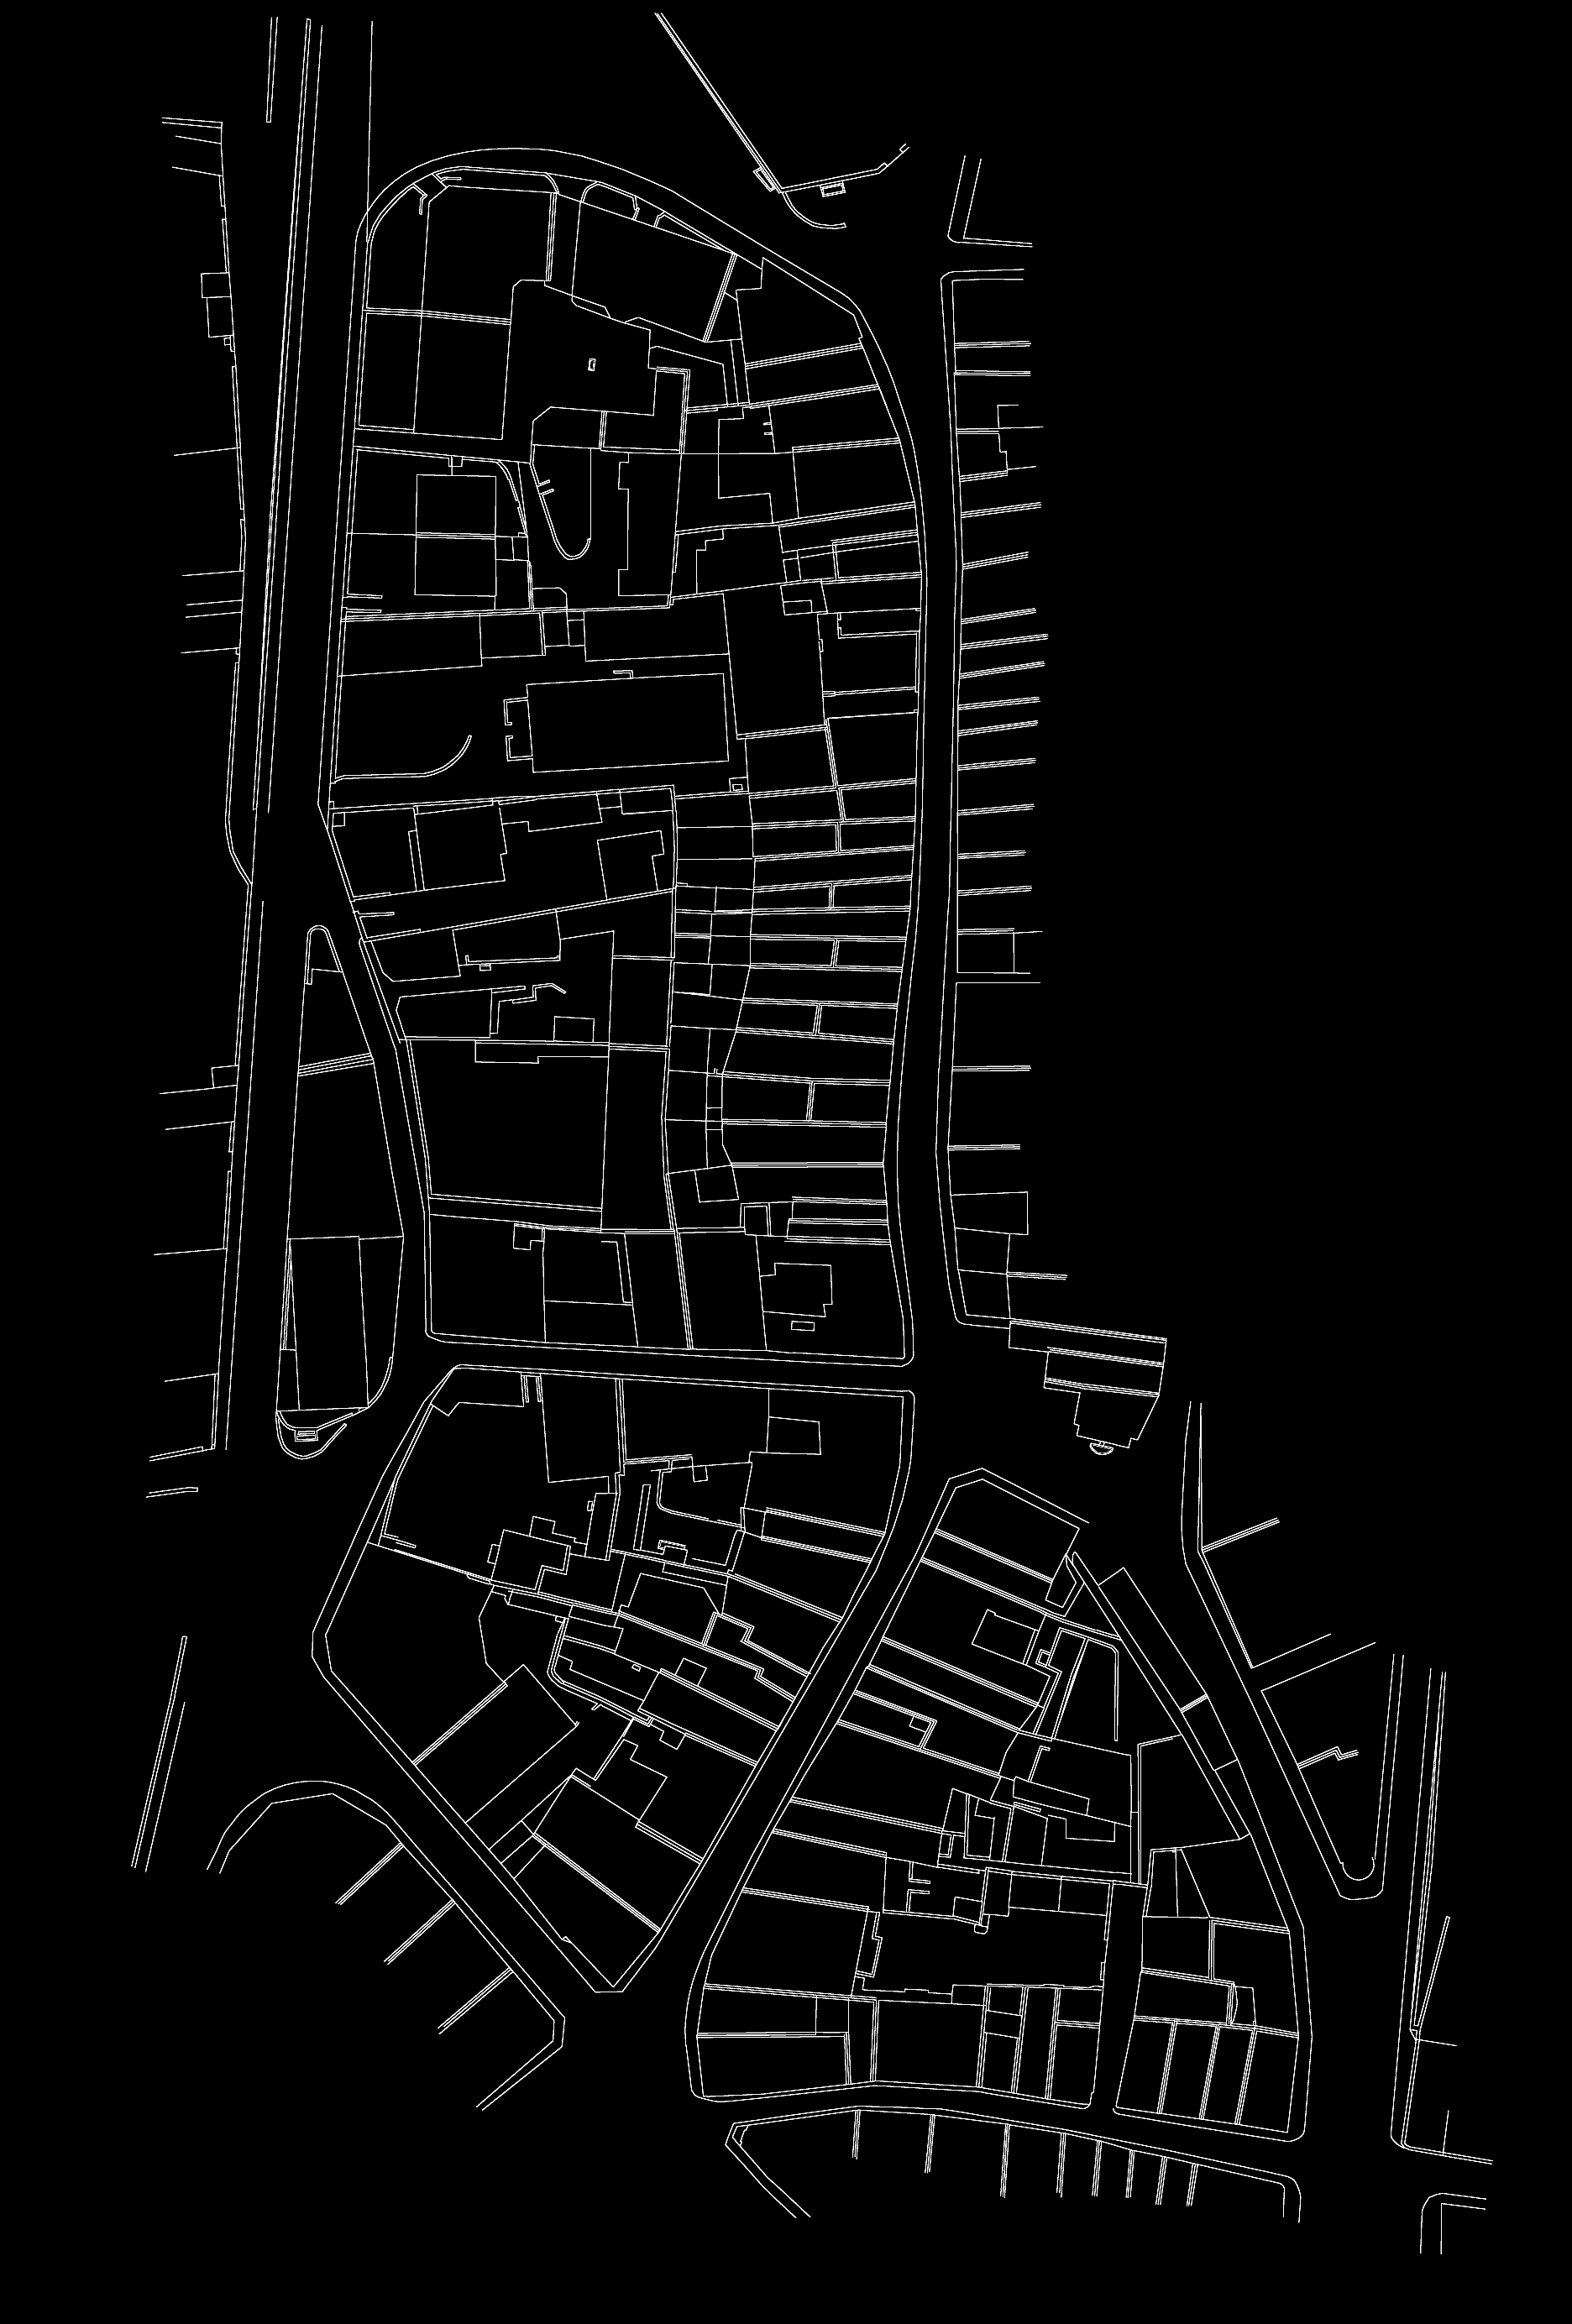

In [119]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (gray.shape[1]//4, gray.shape[0]//4))
Image.fromarray(gray)

In [101]:
distance = ndimage.distance_transform_edt(255-gray)
coords = peak_local_max(distance, min_distance =15)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance, markers, mask=255-gray)
coords.shape

(53, 2)

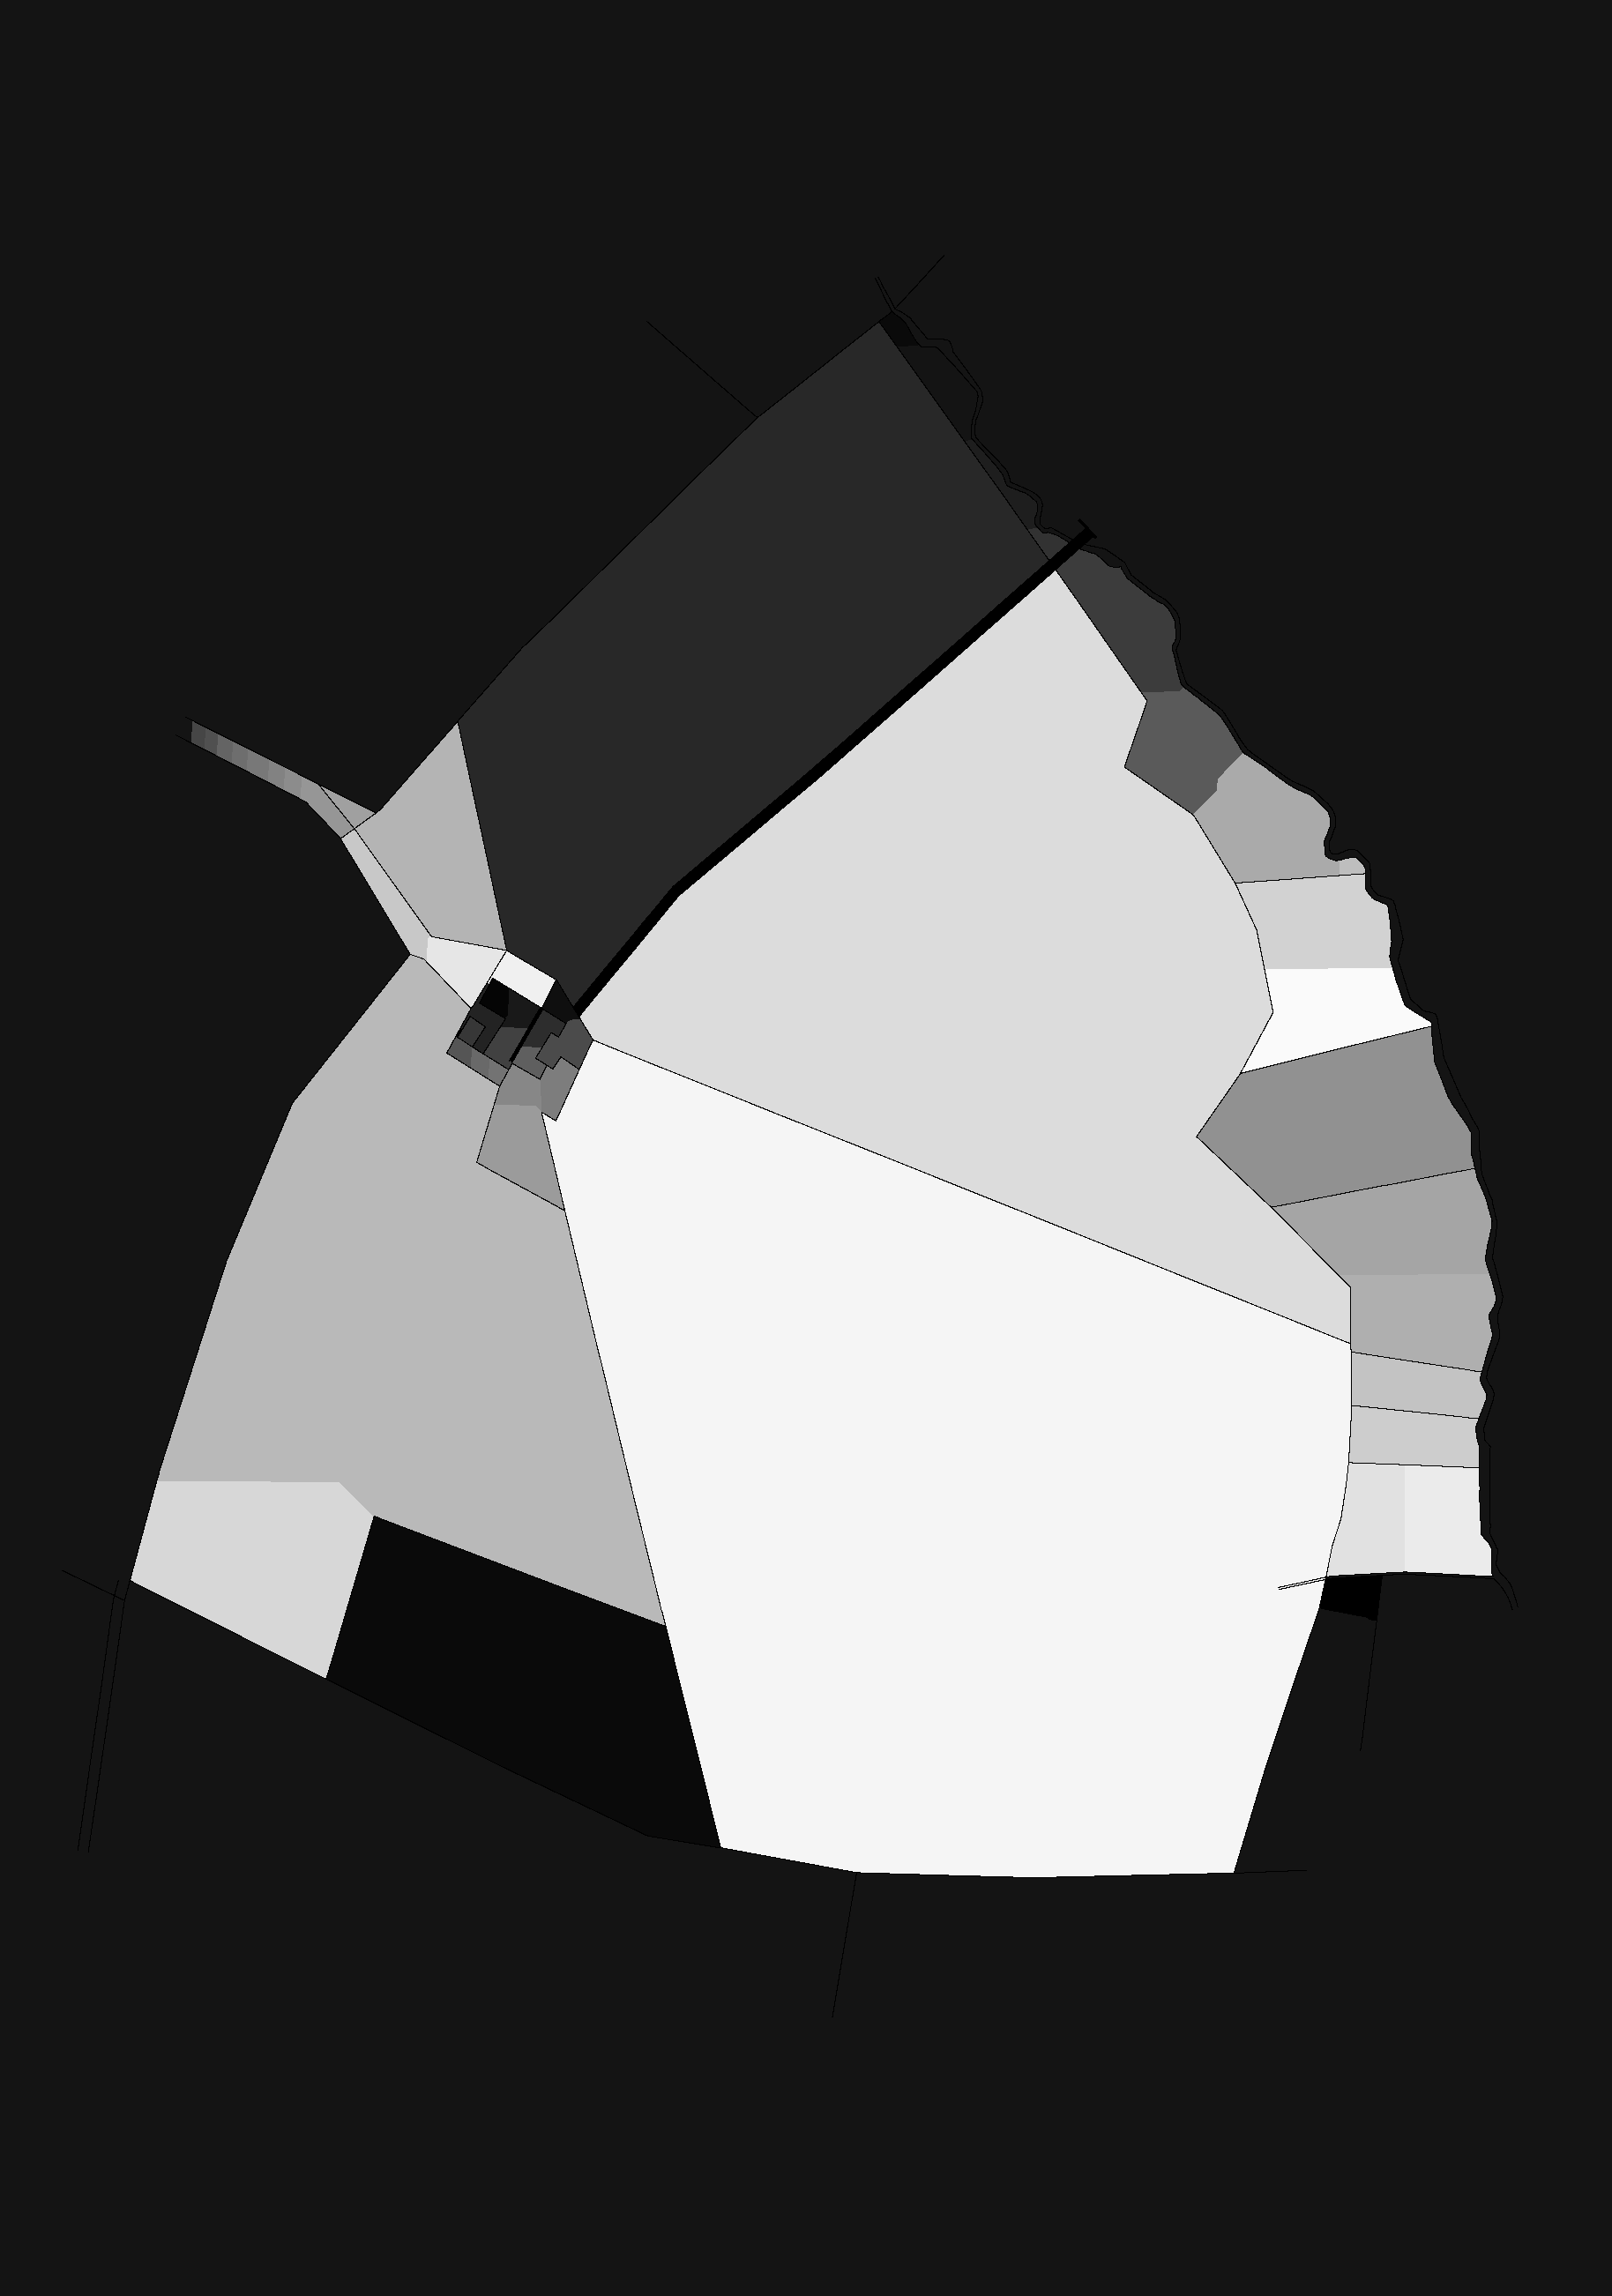

In [104]:
Image.fromarray((labels *10% 255).astype('uint8'))

In [85]:
distance = ndimage.distance_transform_edt(255-gray)
coords = peak_local_max(distance, min_distance =10)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance, markers, mask=255-gray)
coords.shape

(1911, 2)

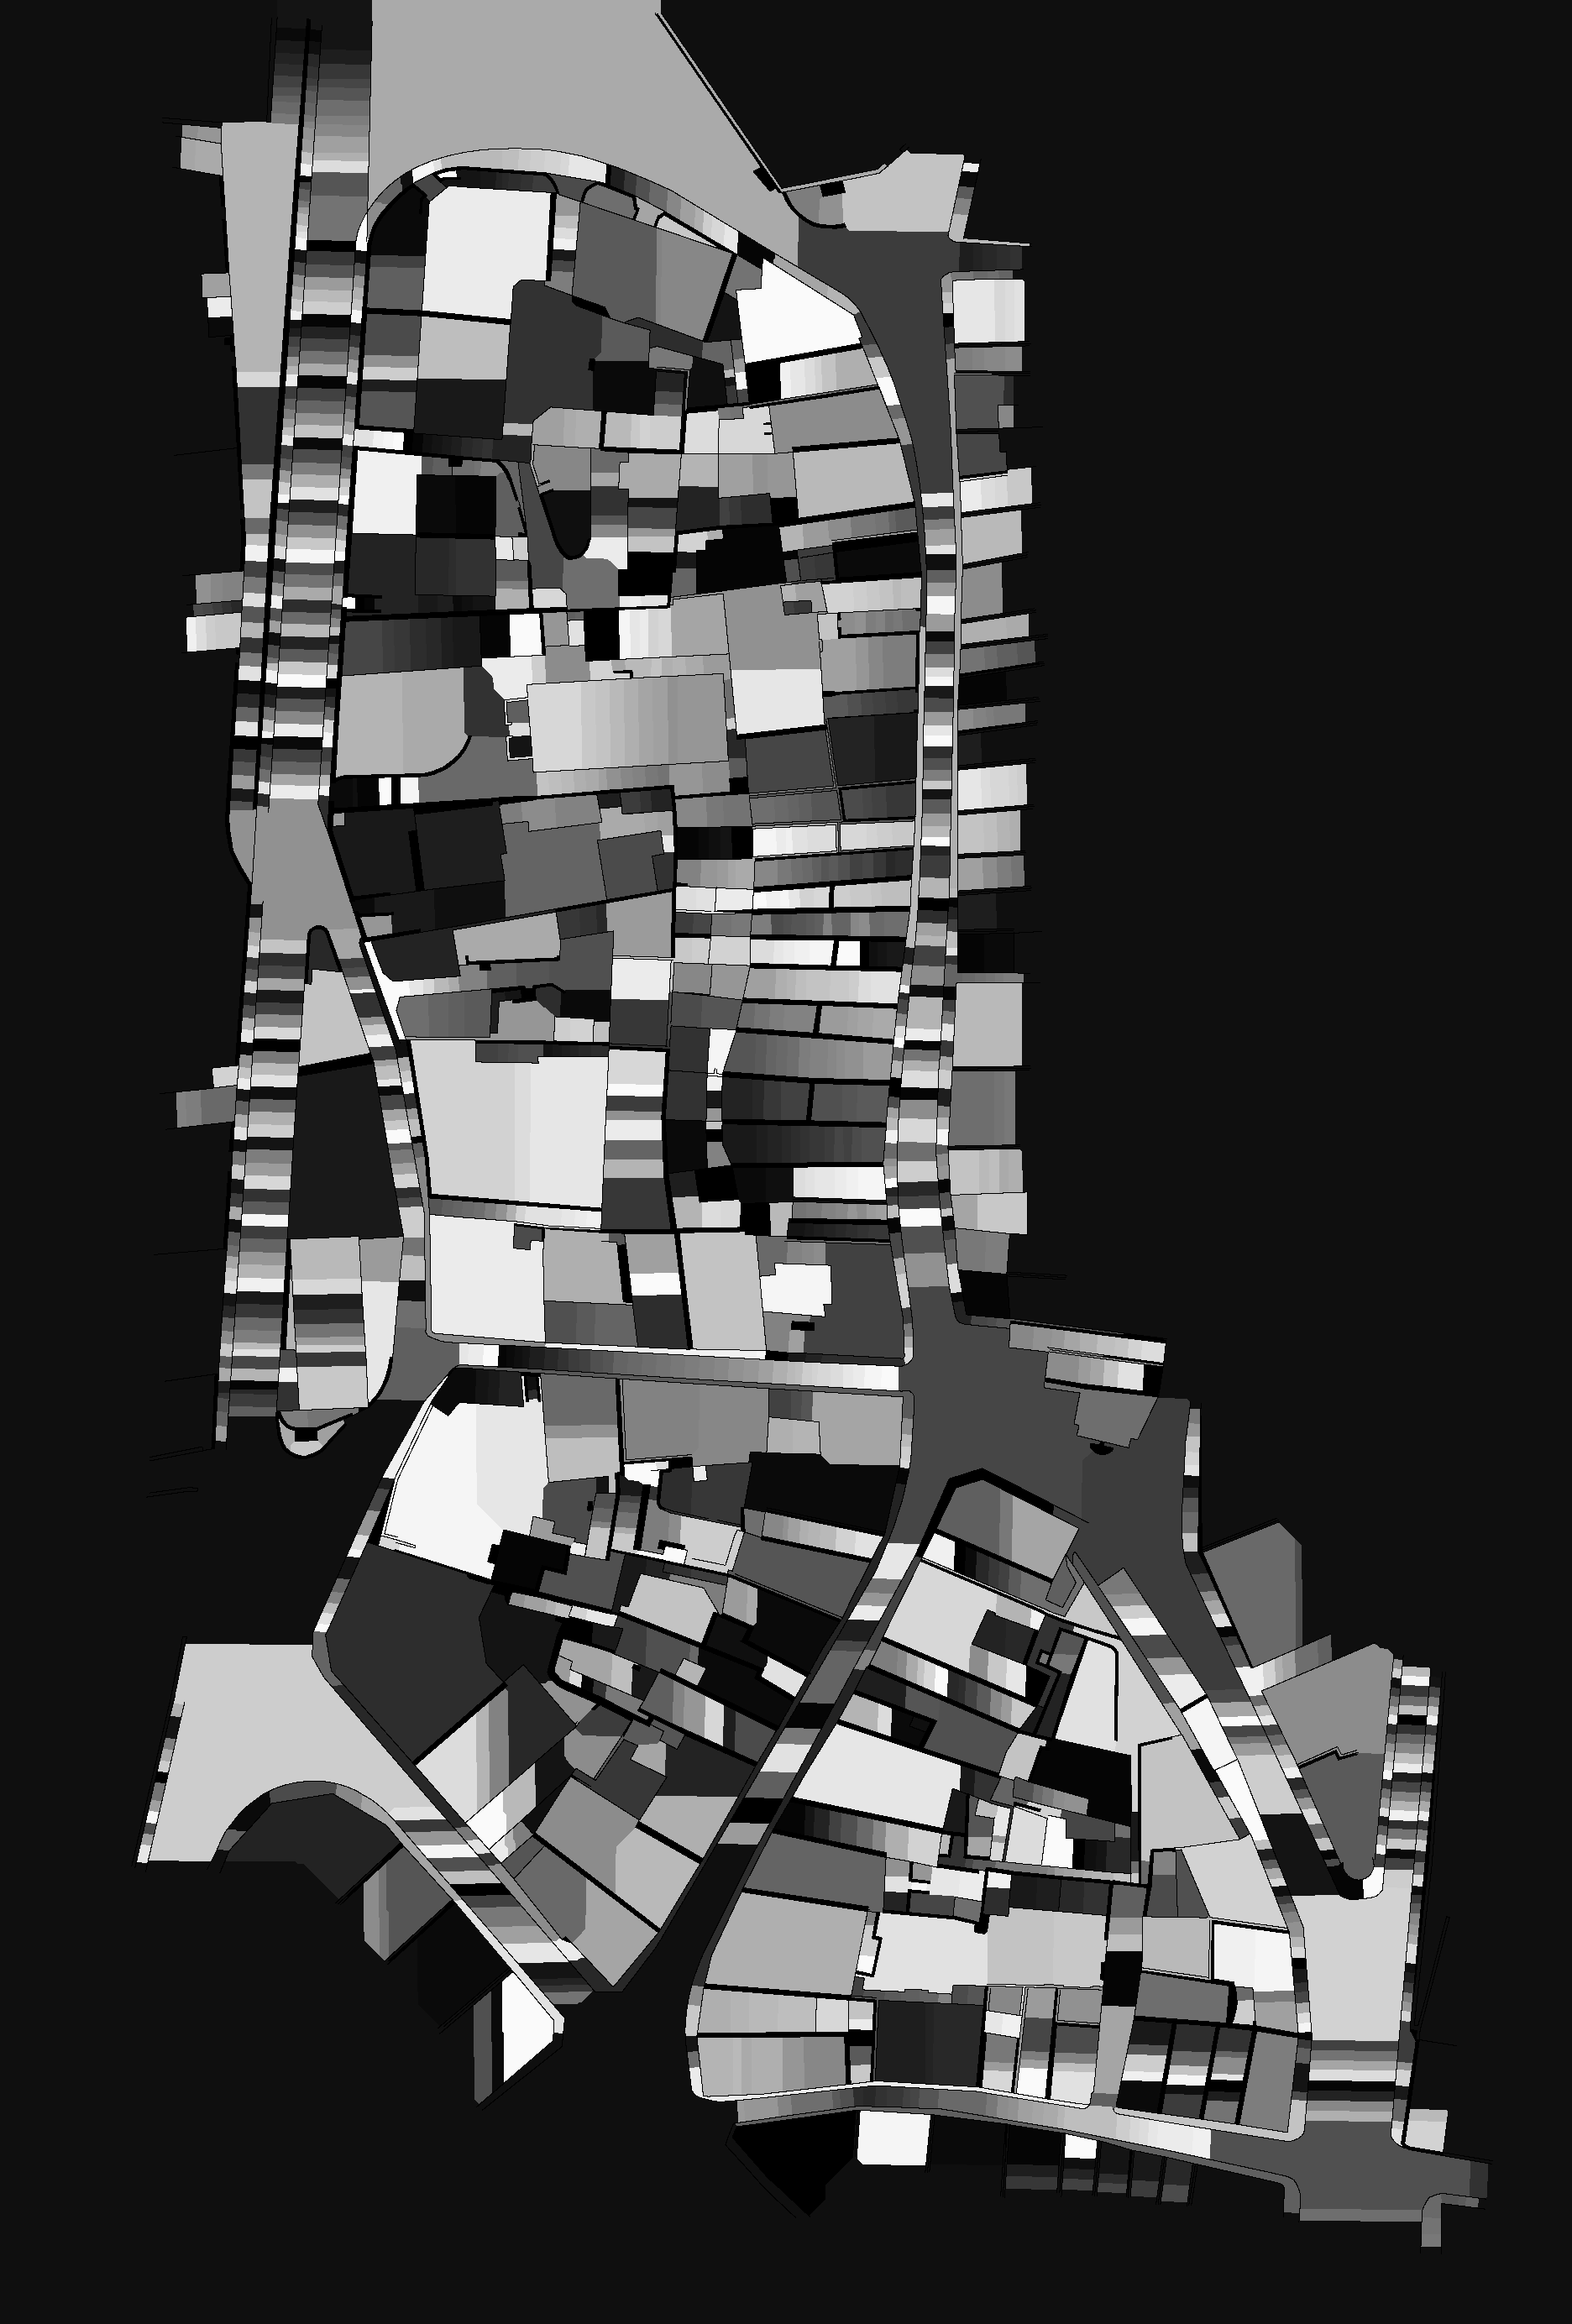

In [86]:
Image.fromarray((labels *5 % 255).astype('uint8'))

In [87]:
distance = ndimage.distance_transform_edt(255-gray)
coords = peak_local_max(distance, min_distance =20)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance, markers, mask=255-gray)
coords.shape

(621, 2)

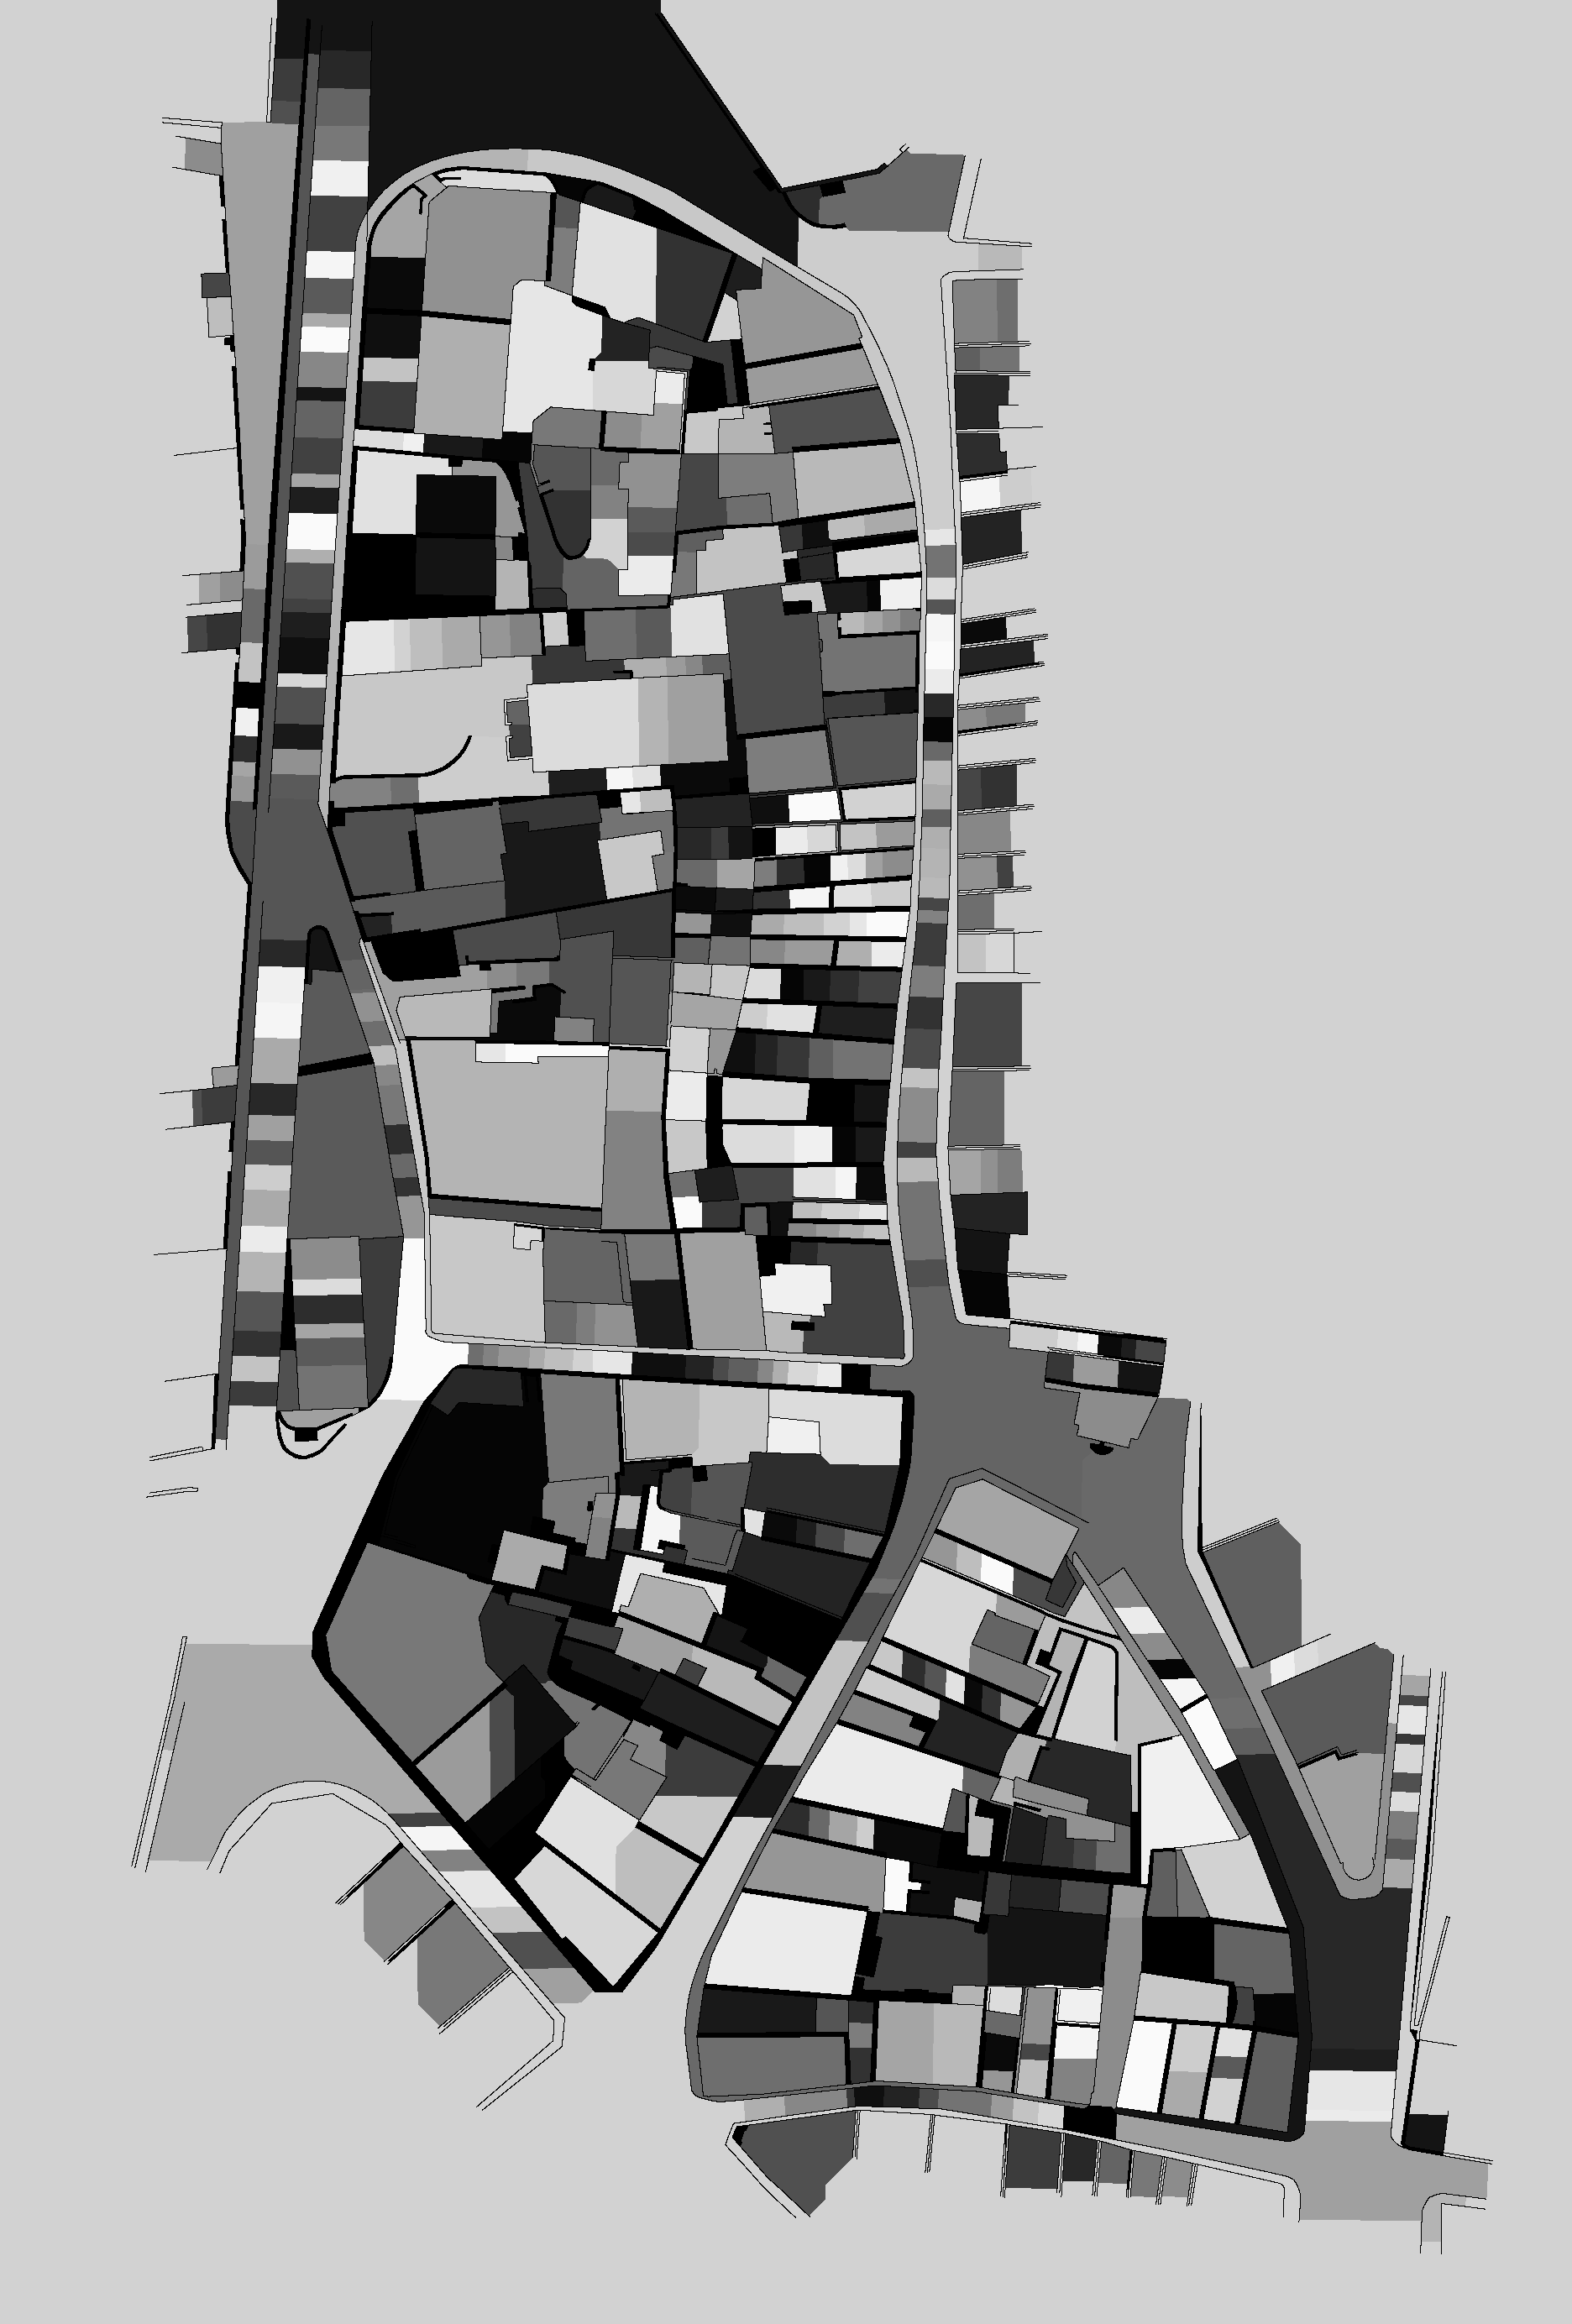

In [88]:
Image.fromarray((labels *20 % 255).astype('uint8'))

In [89]:
distance = ndimage.distance_transform_edt(255-gray)
coords = peak_local_max(distance, min_distance =30)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance, markers, mask=255-gray)
coords.shape

(356, 2)

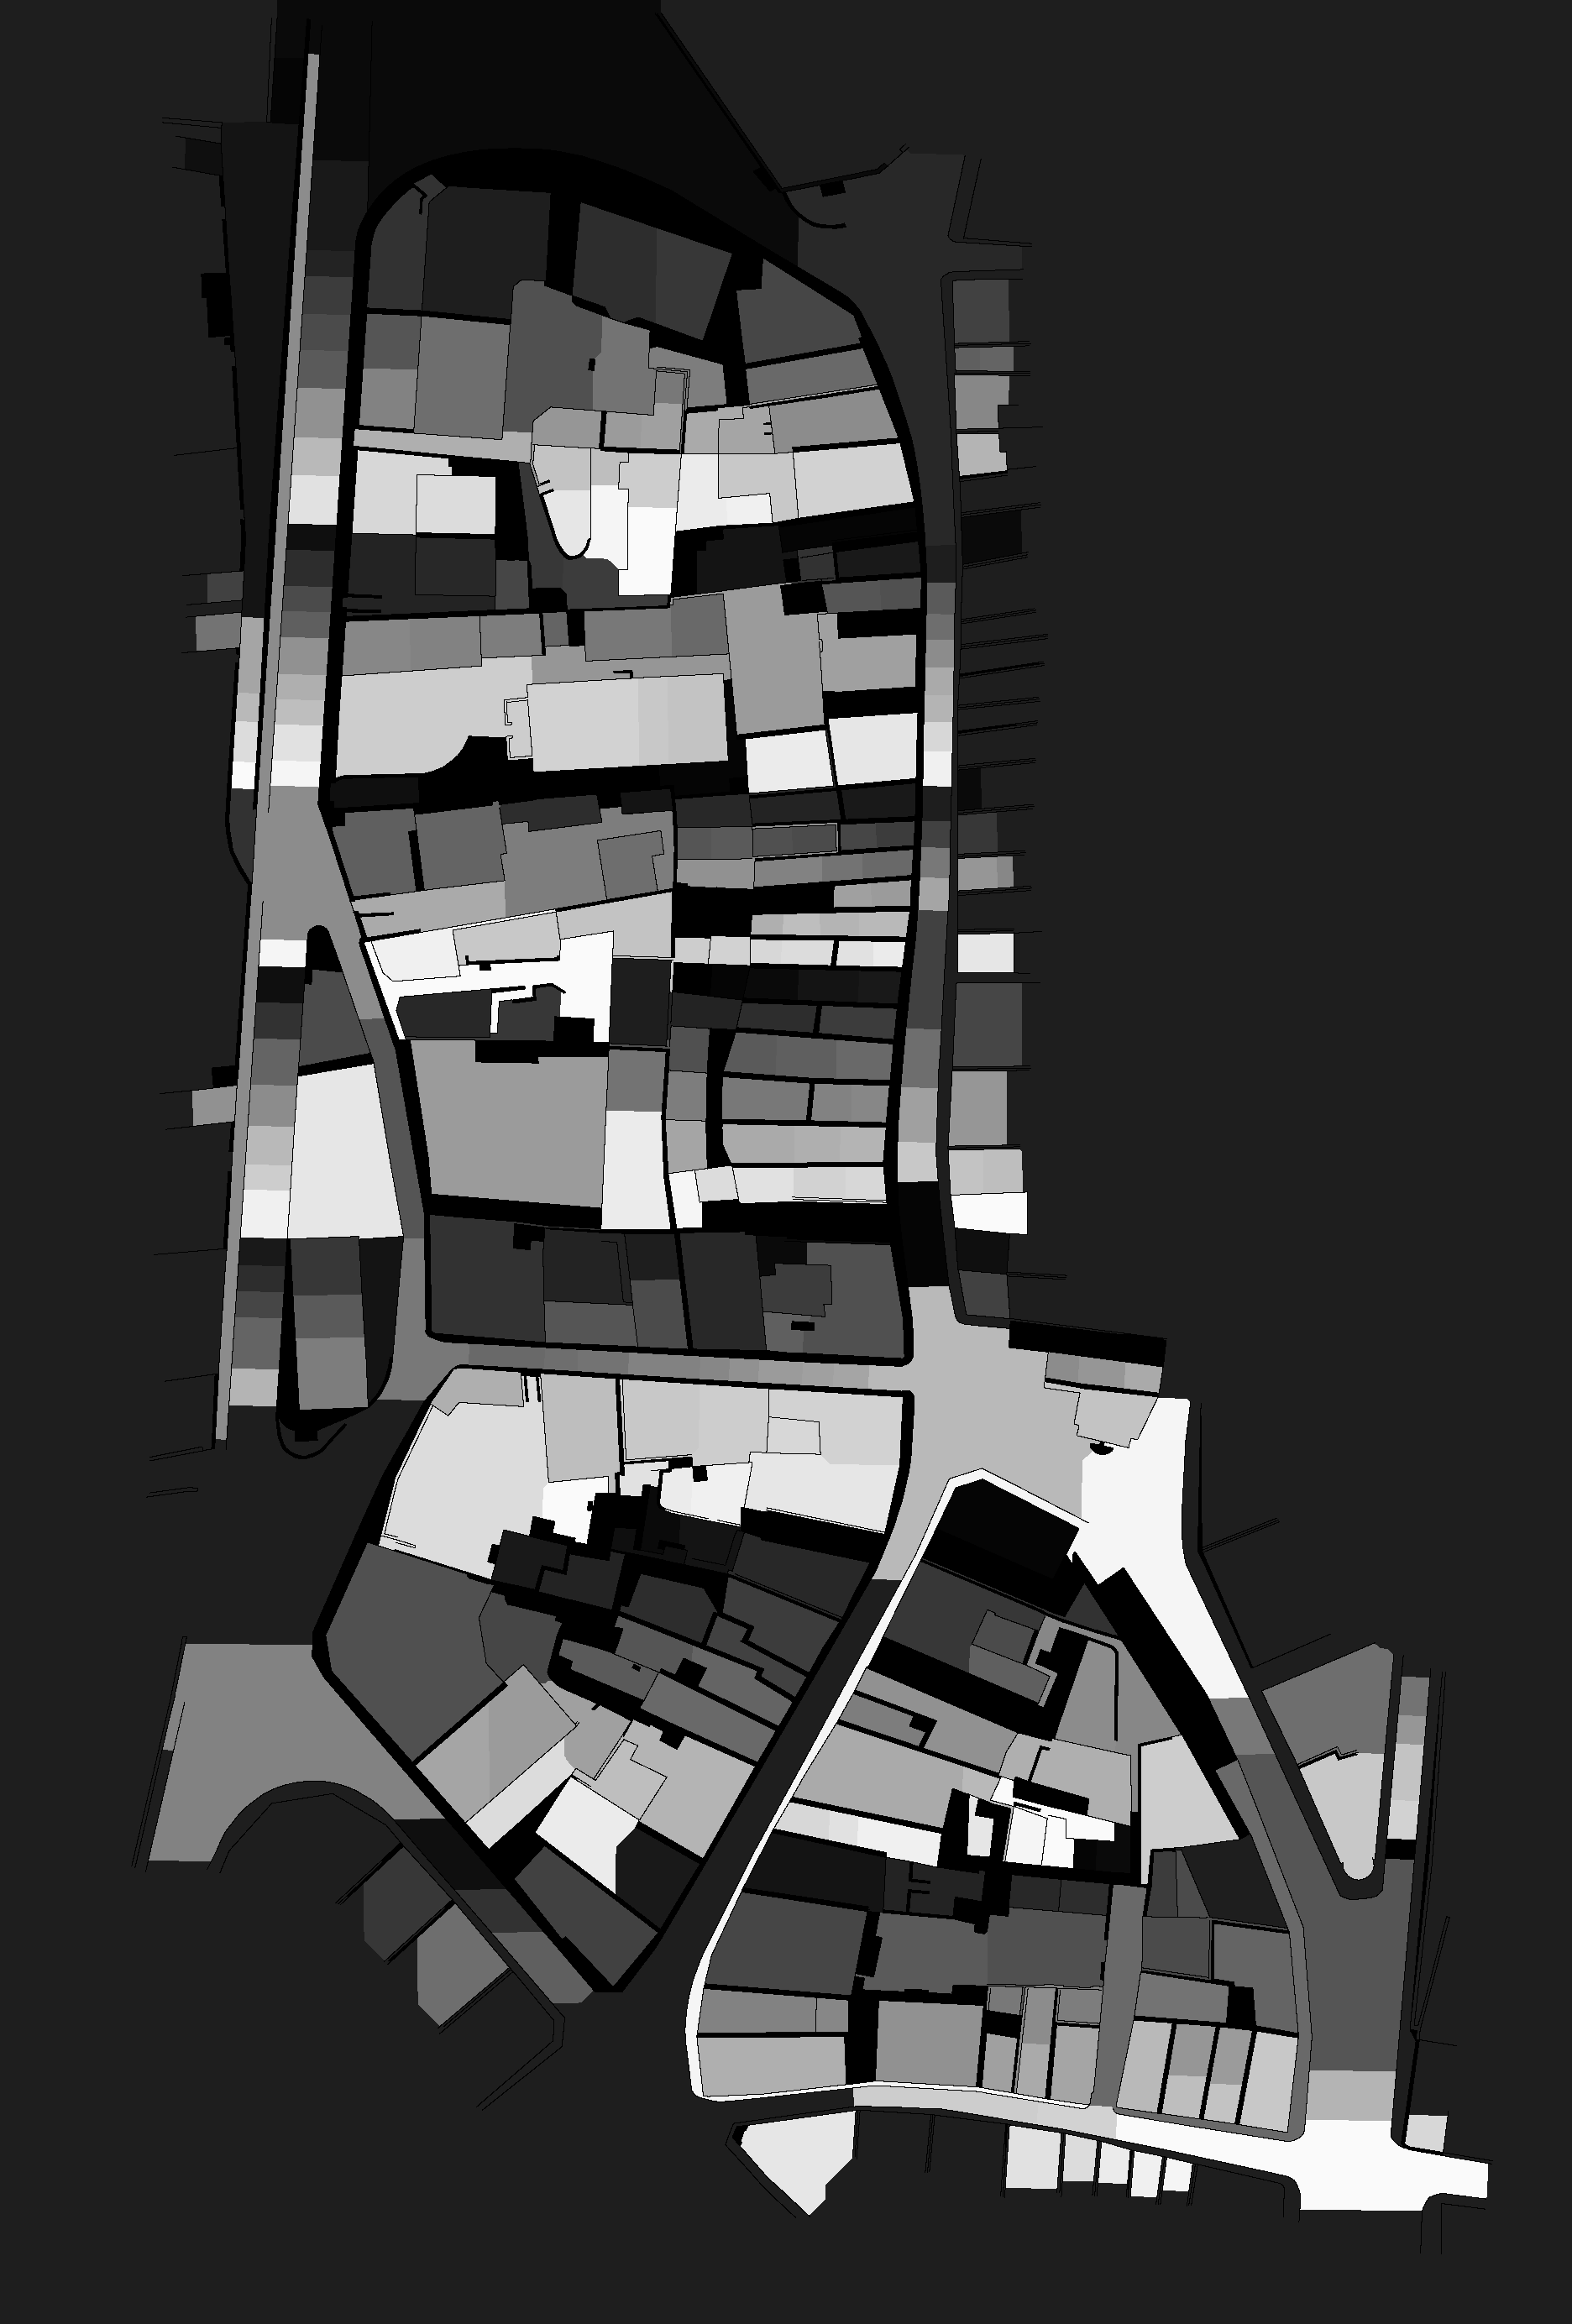

In [90]:
Image.fromarray((labels * 5 % 255).astype('uint8'))

In [91]:
coords = peak_local_max(distance, min_distance =50)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance, markers, mask=255-gray)
labels.max()

146

In [94]:
coords.shape

(146, 2)

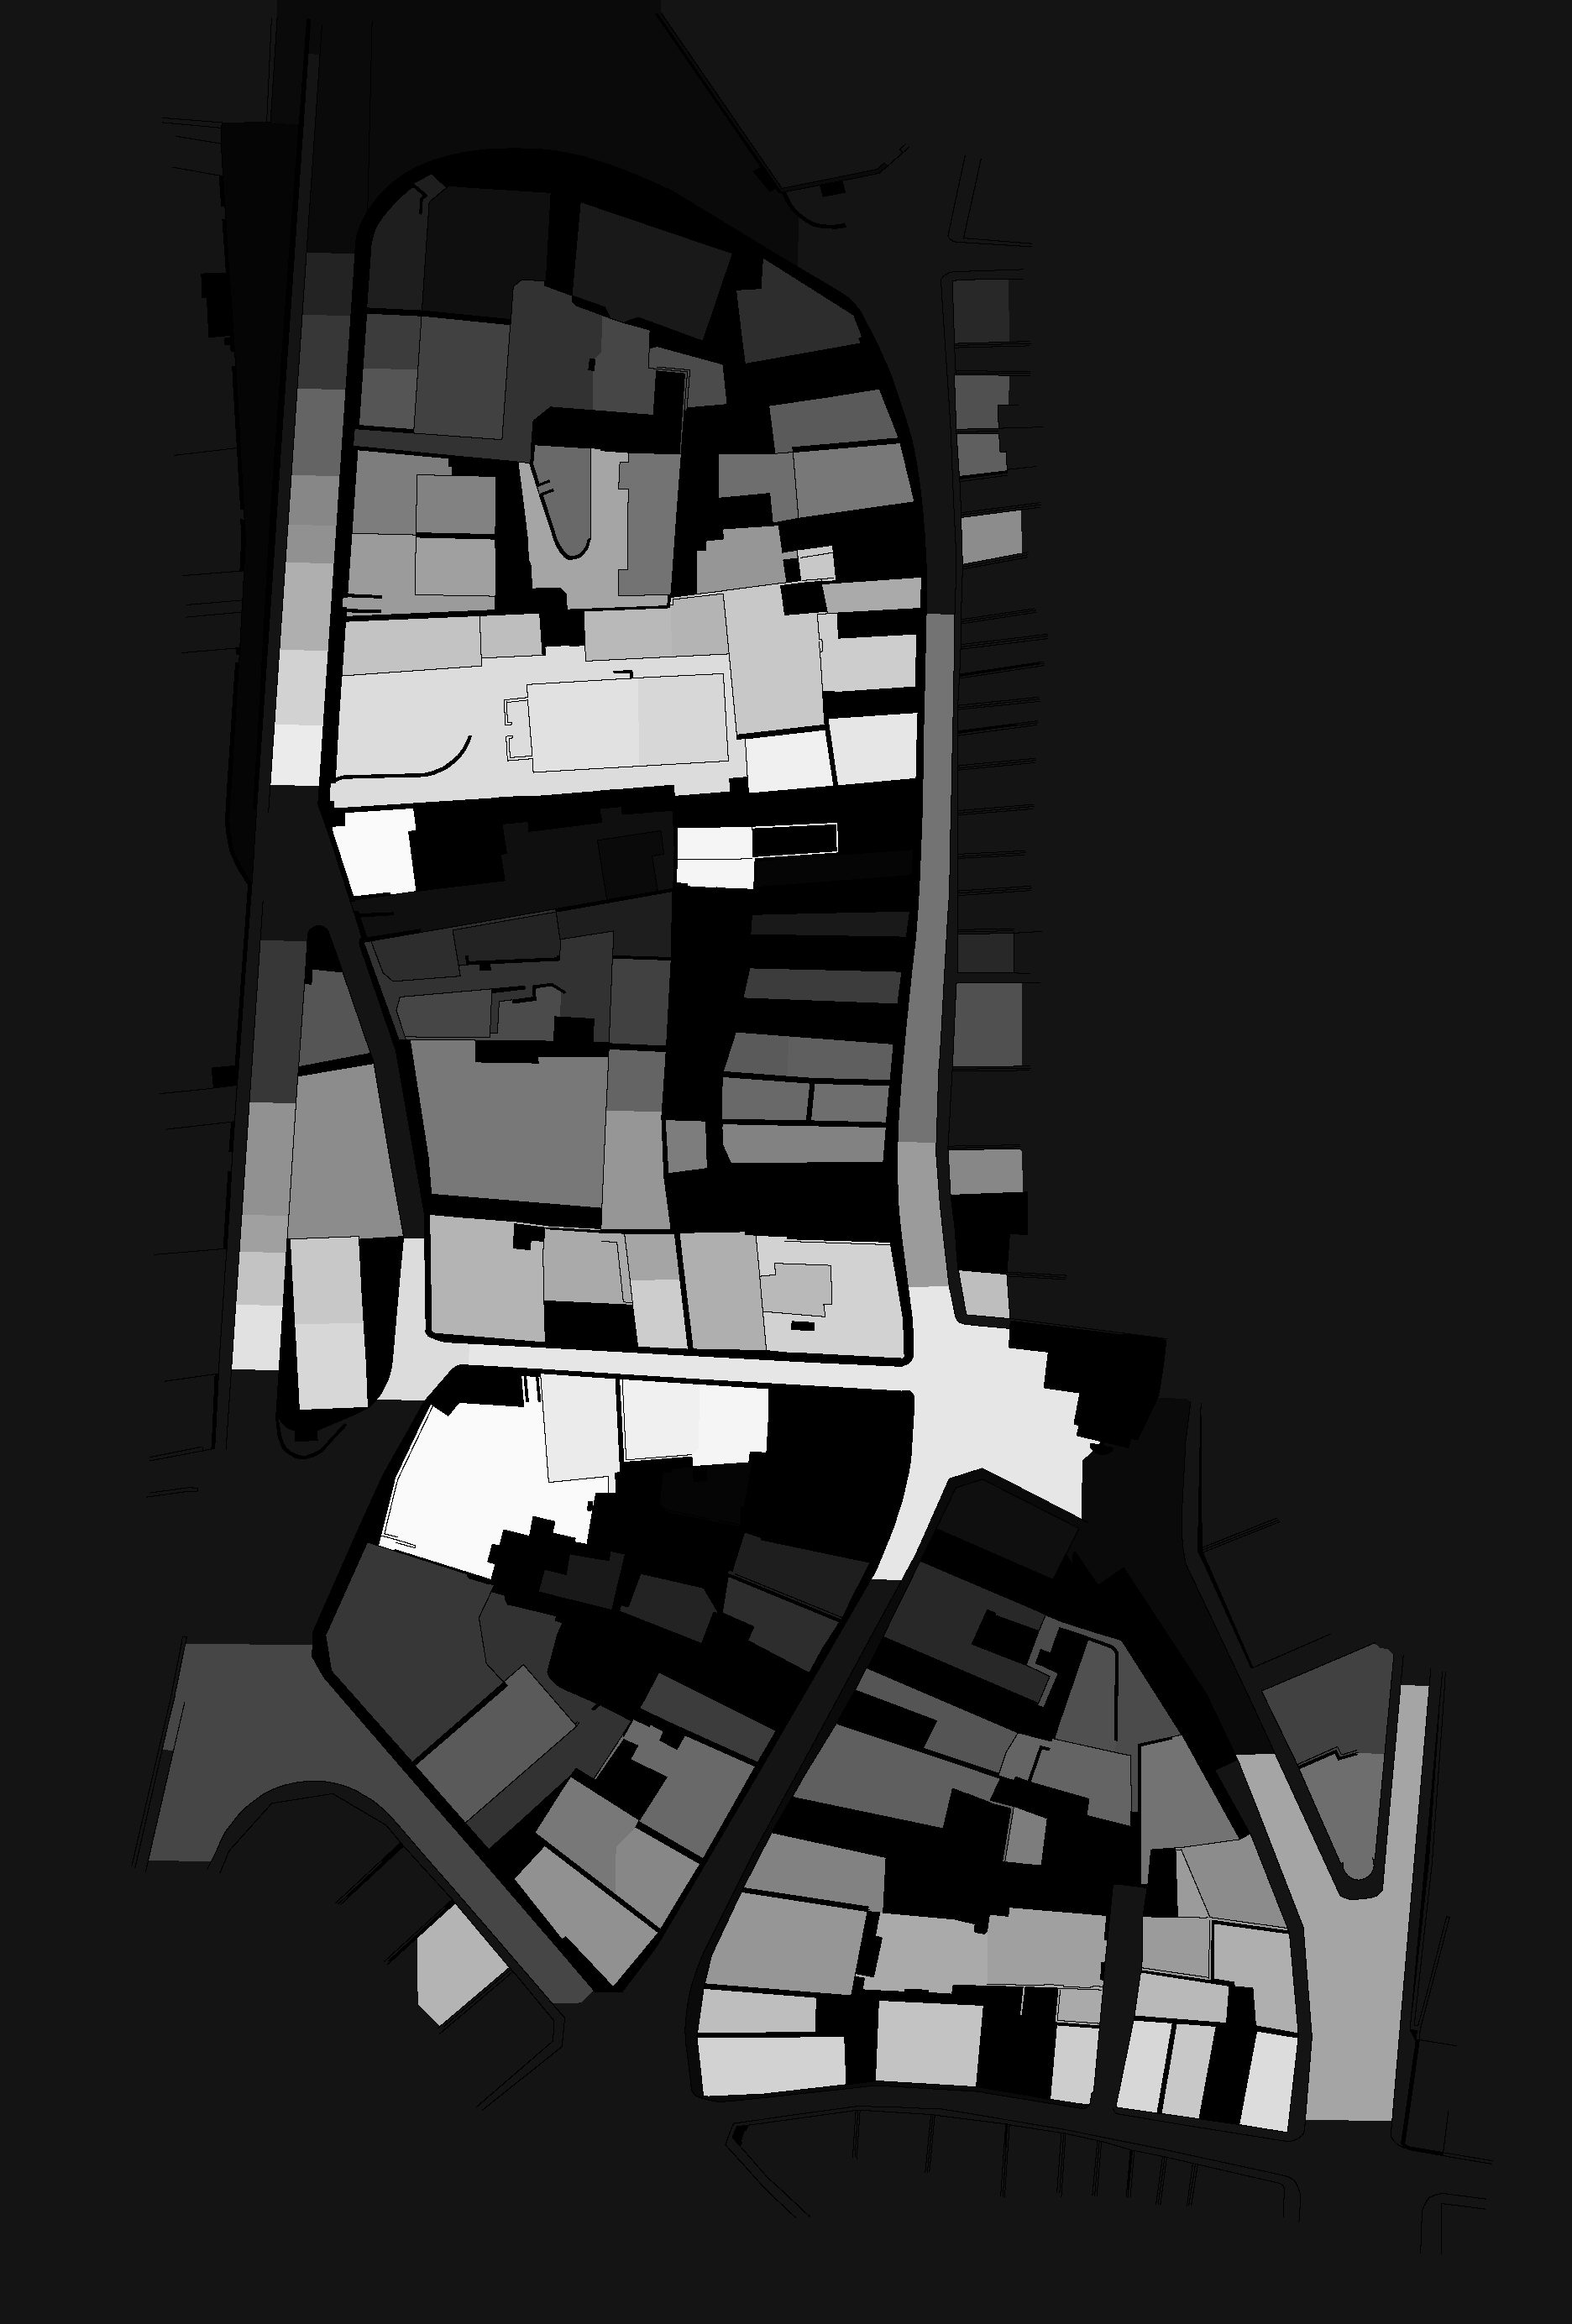

In [95]:
Image.fromarray((labels *5 % 255).astype('uint8'))

In [96]:
coords = peak_local_max(distance, min_distance =100)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance, markers, mask=255-gray)
coords.shape

(42, 2)

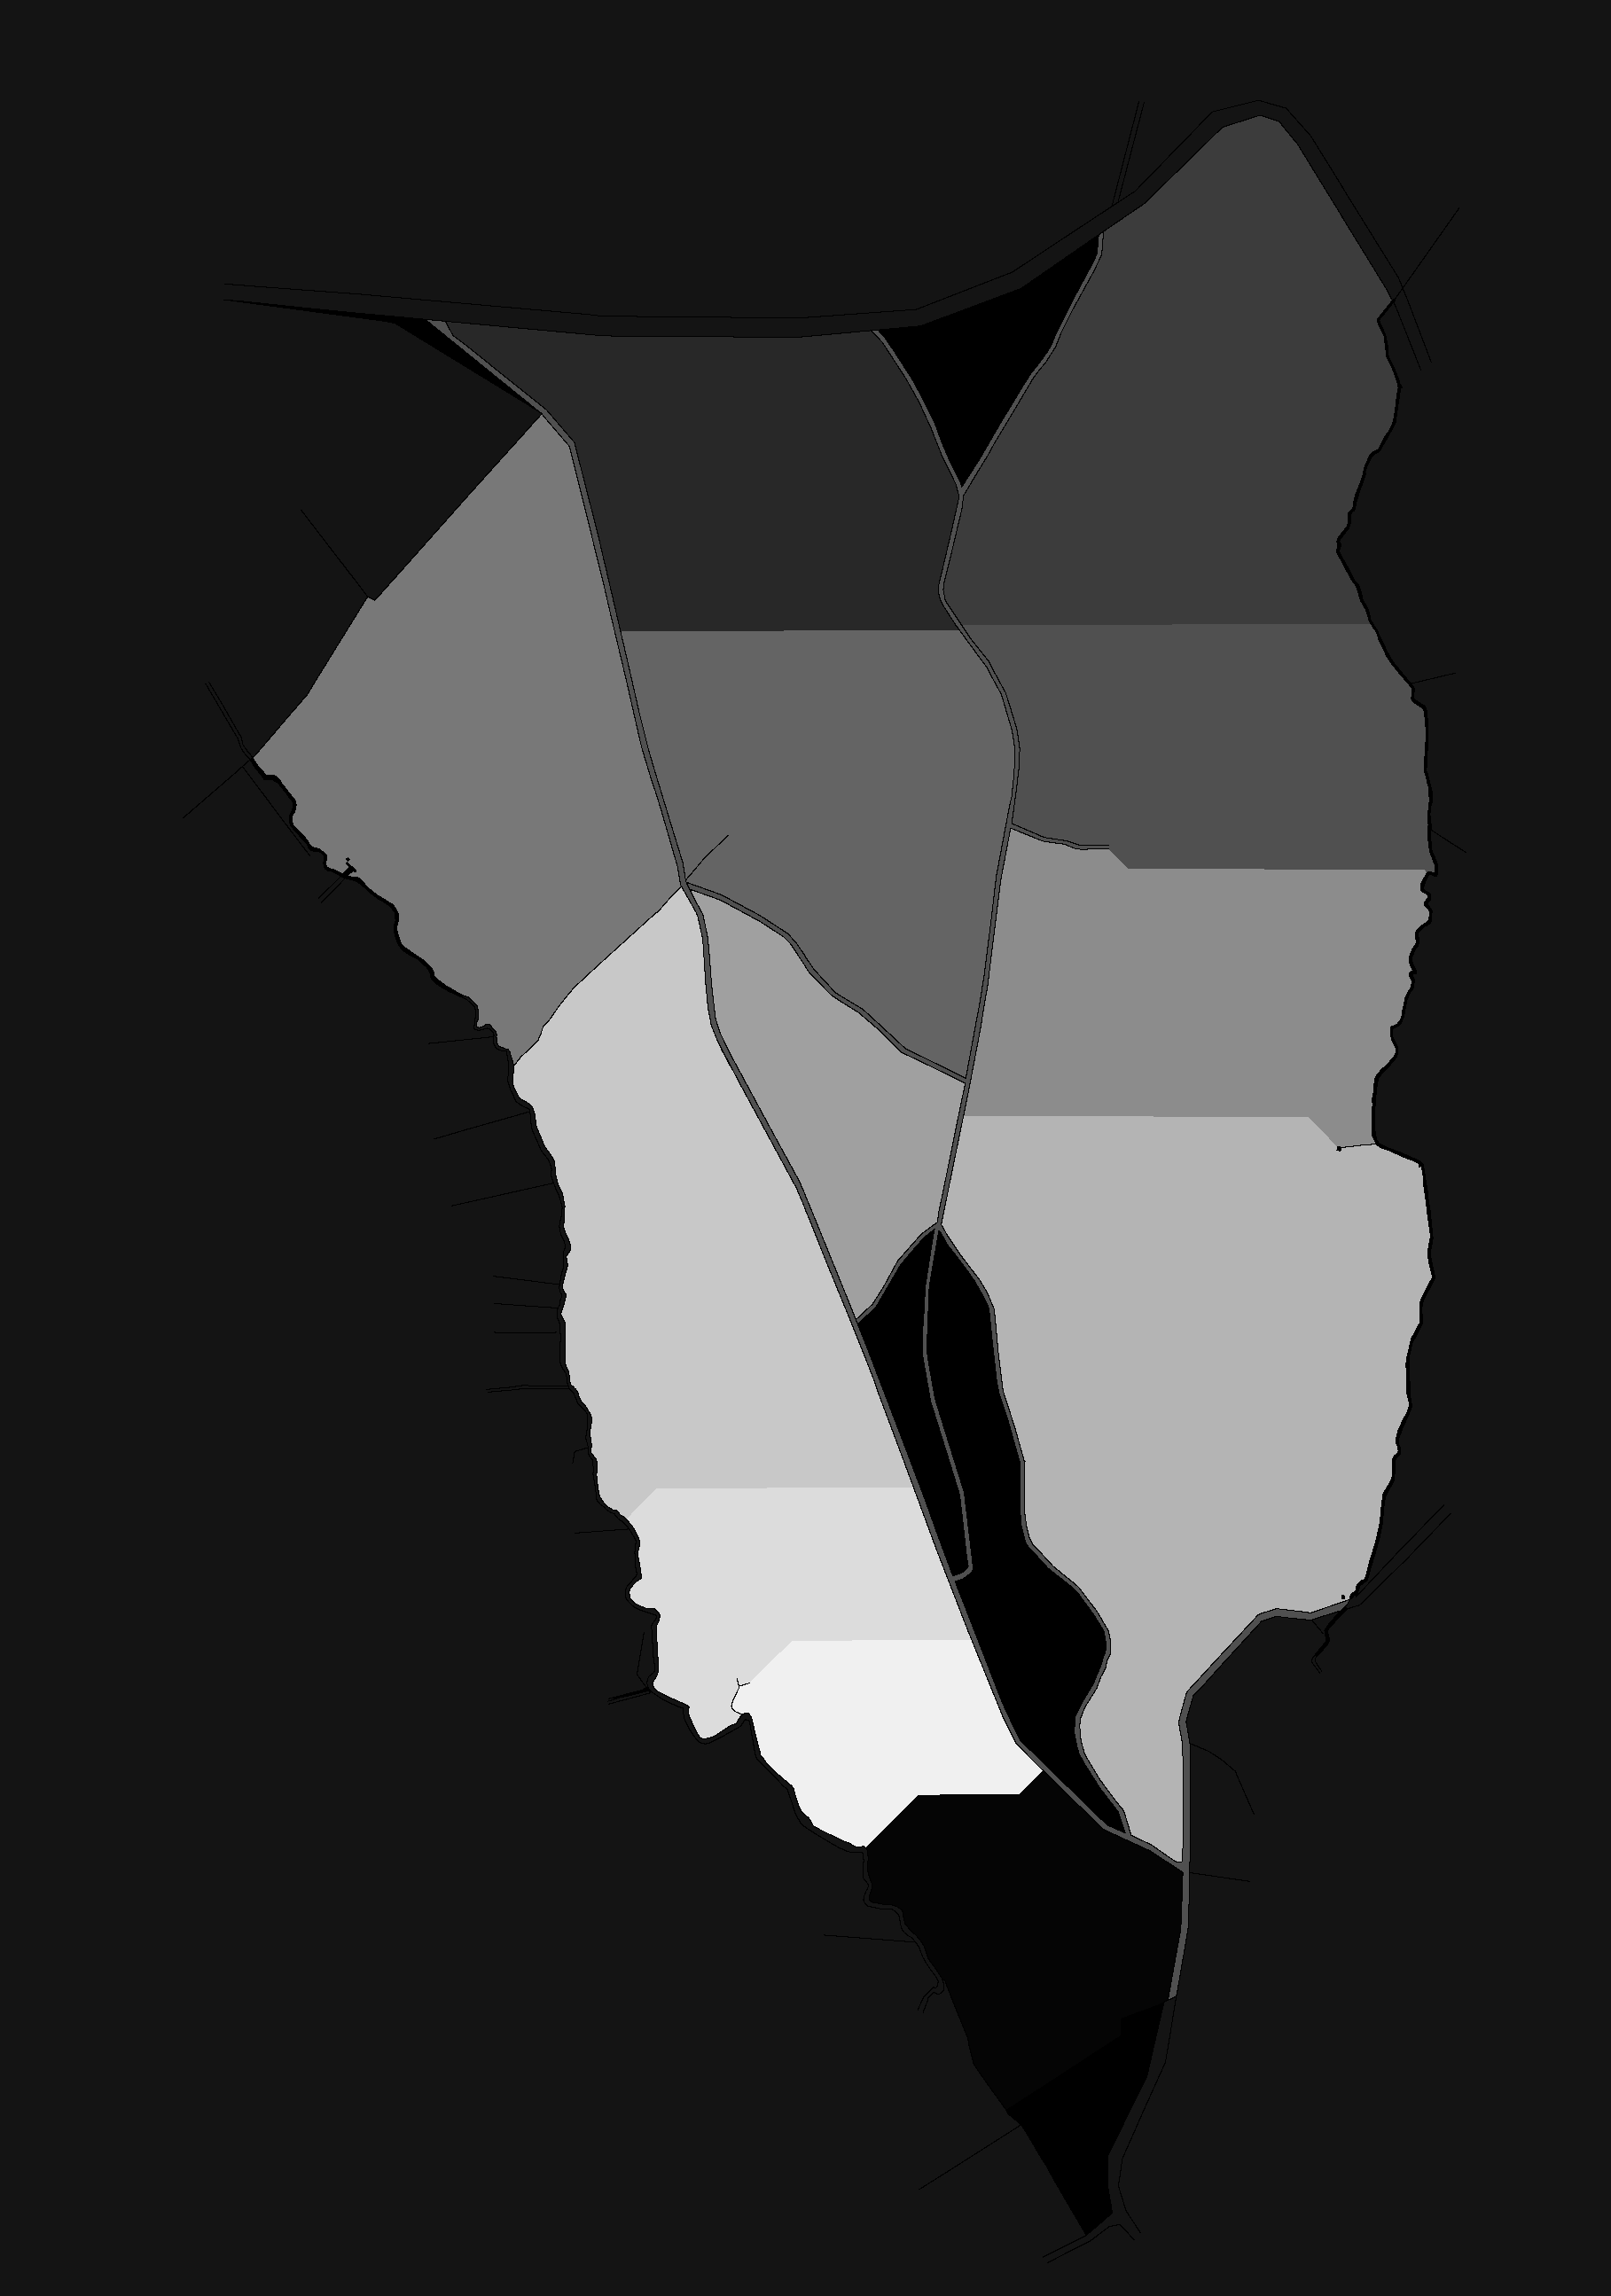

In [69]:
Image.fromarray((labels *20 % 255).astype('uint8'))

In [126]:
f = felzenszwalb(gray, scale=10000.0)
f.max()

543

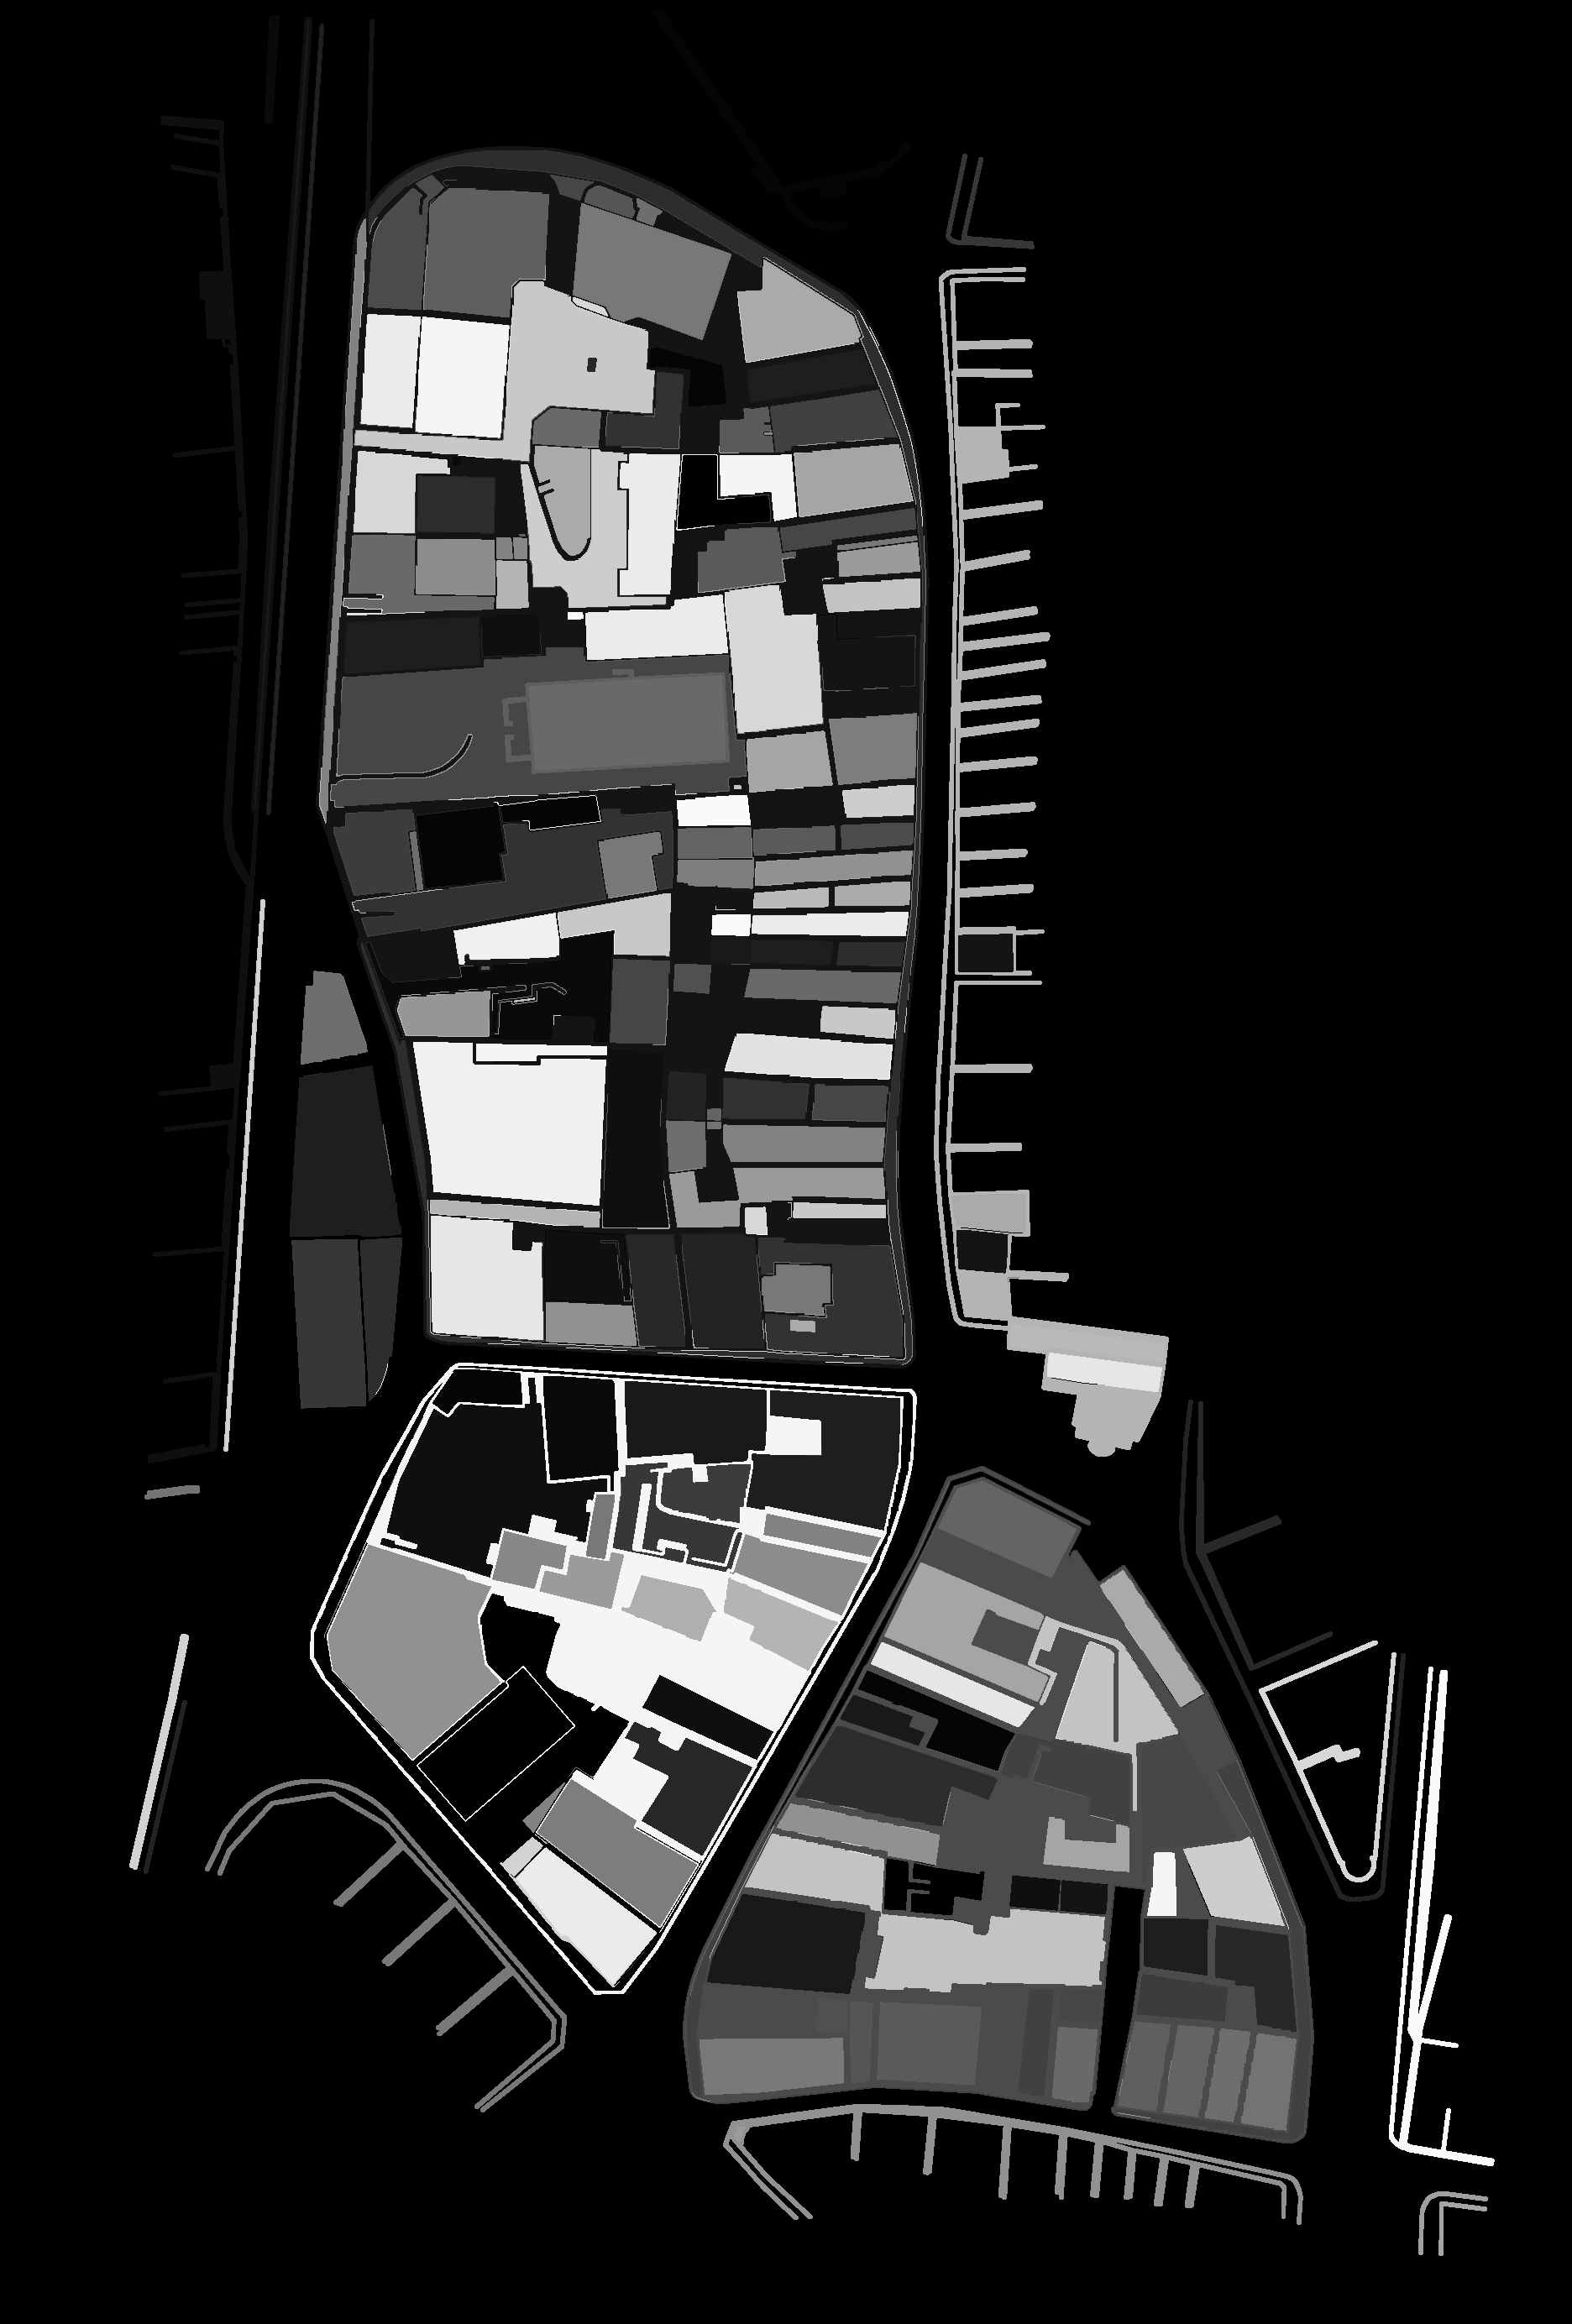

In [128]:
Image.fromarray((f * 5 % 255).astype('uint8'))

In [239]:
res = join_segmentations(f, labels)

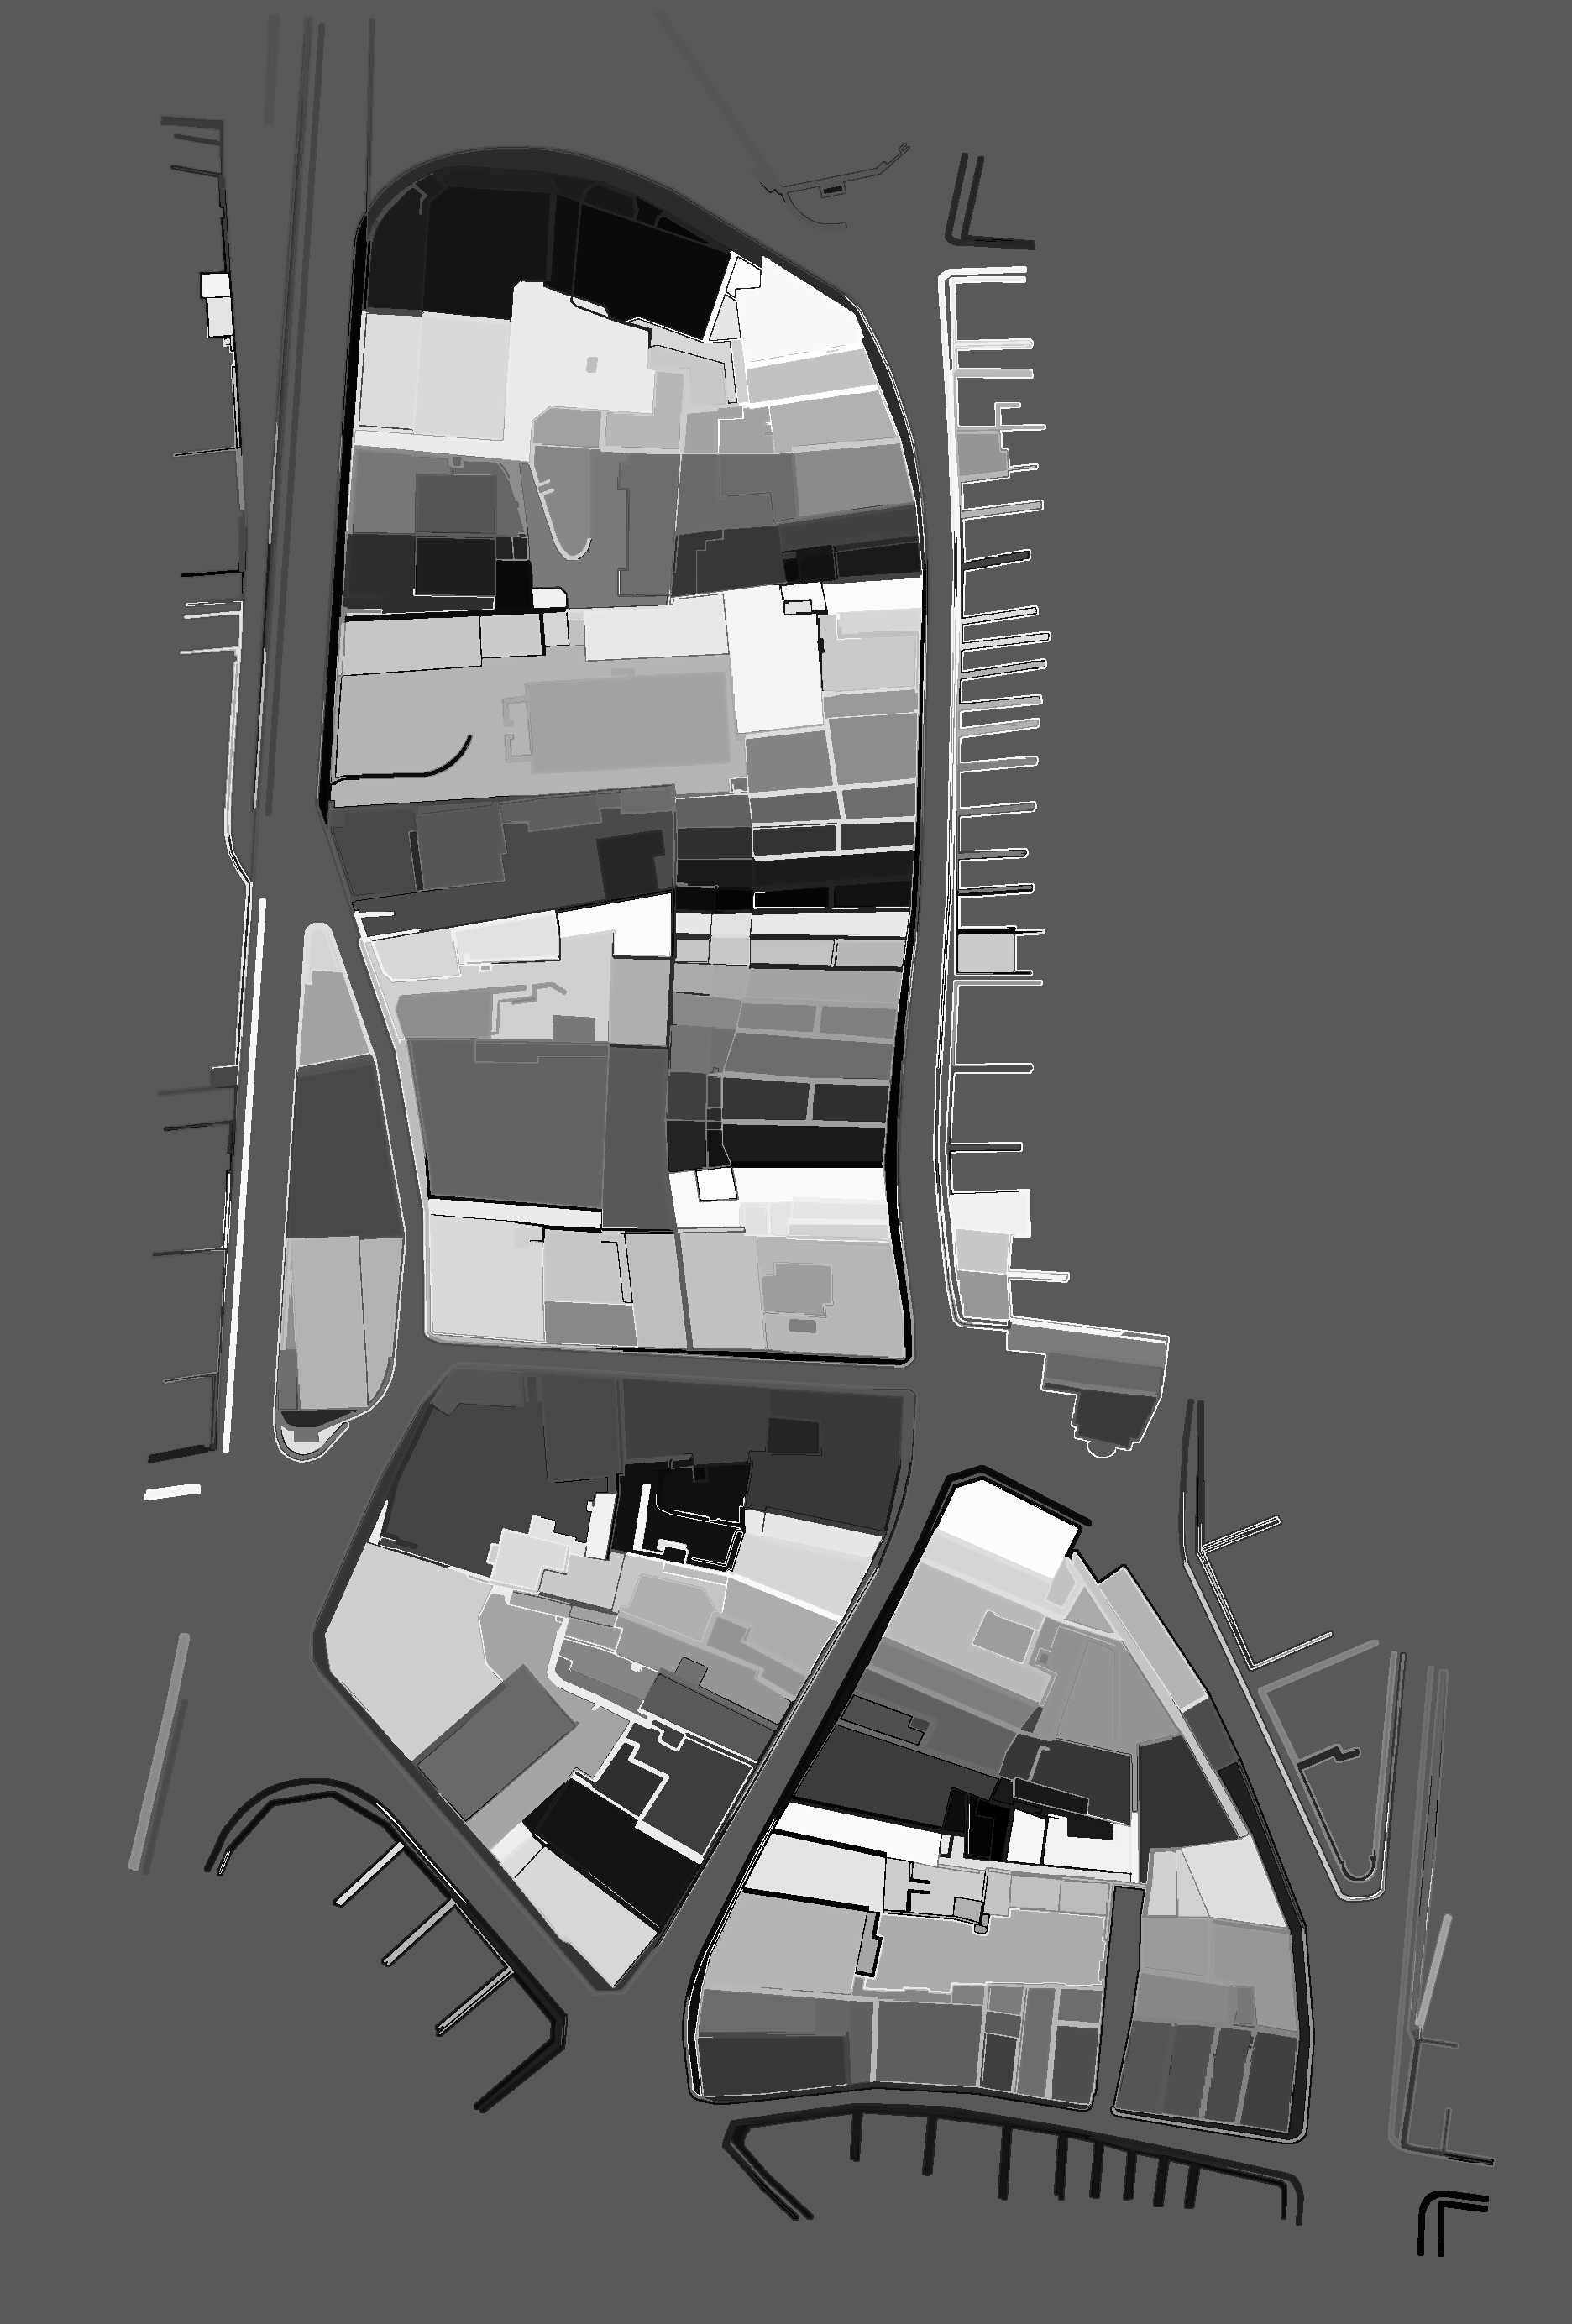

In [240]:
Image.fromarray(((f.max()-f) % 255).astype('uint8'))

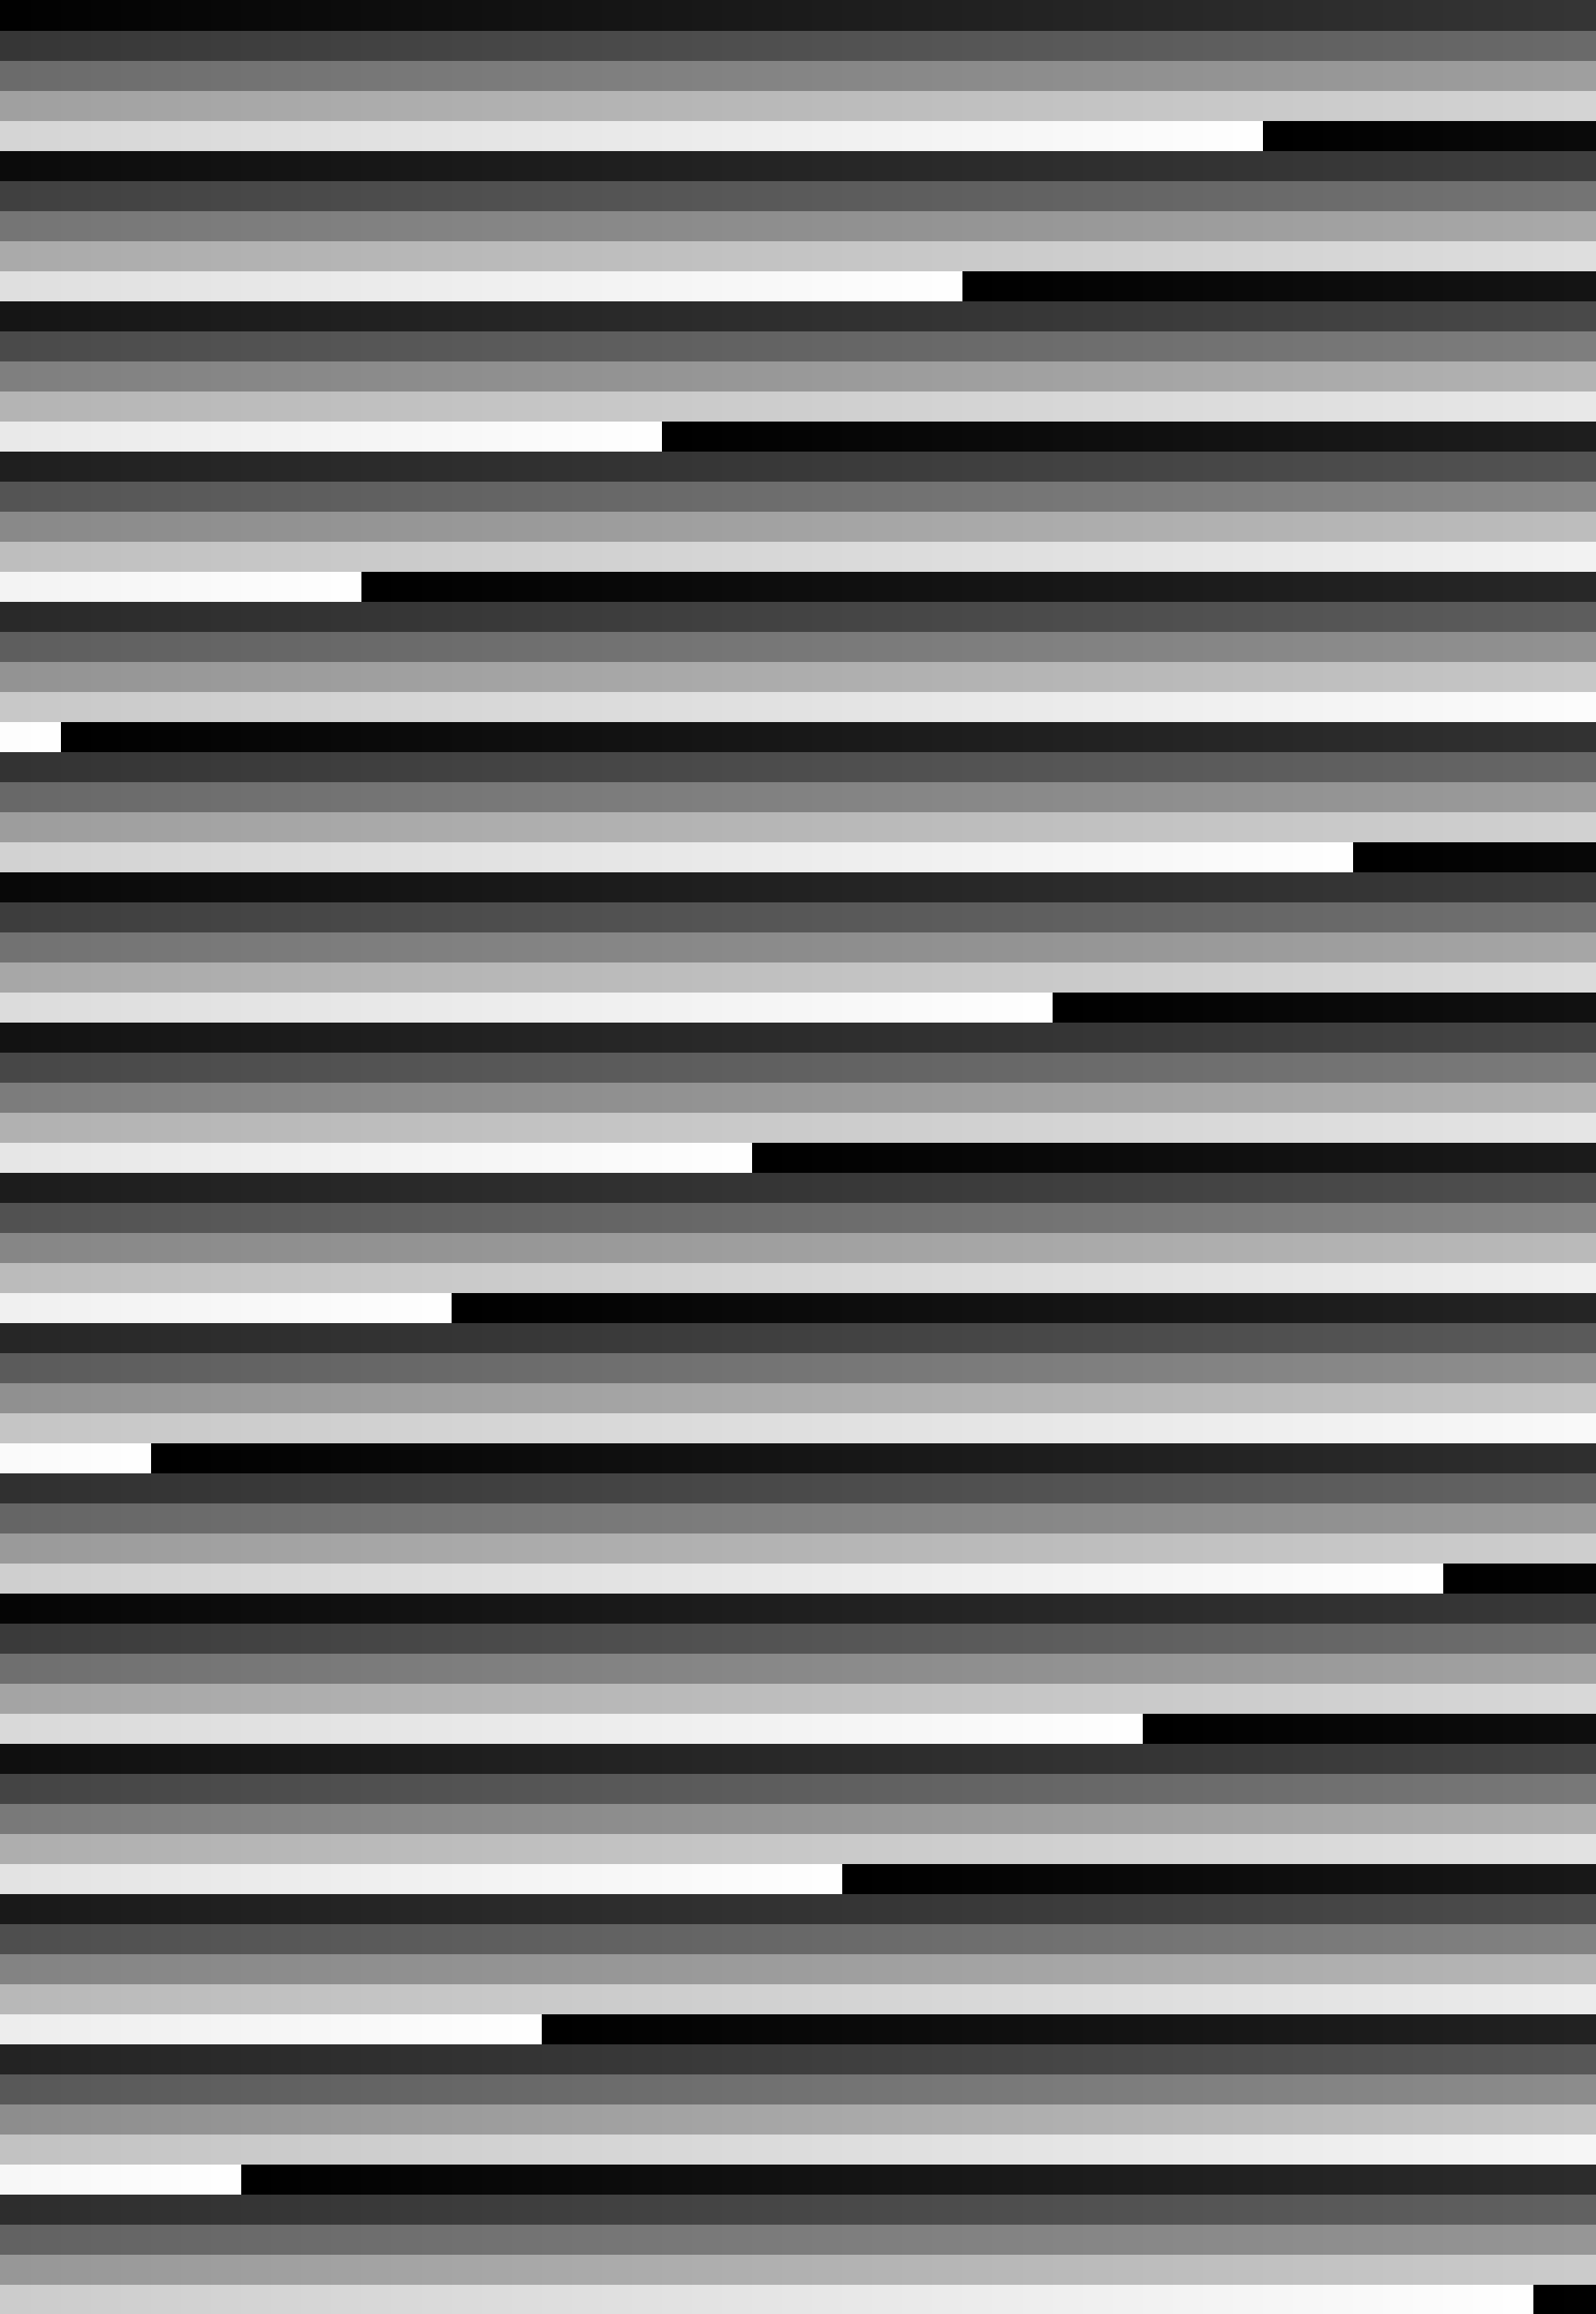

In [210]:
Image.fromarray((kmeans % 255).astype('uint8'))

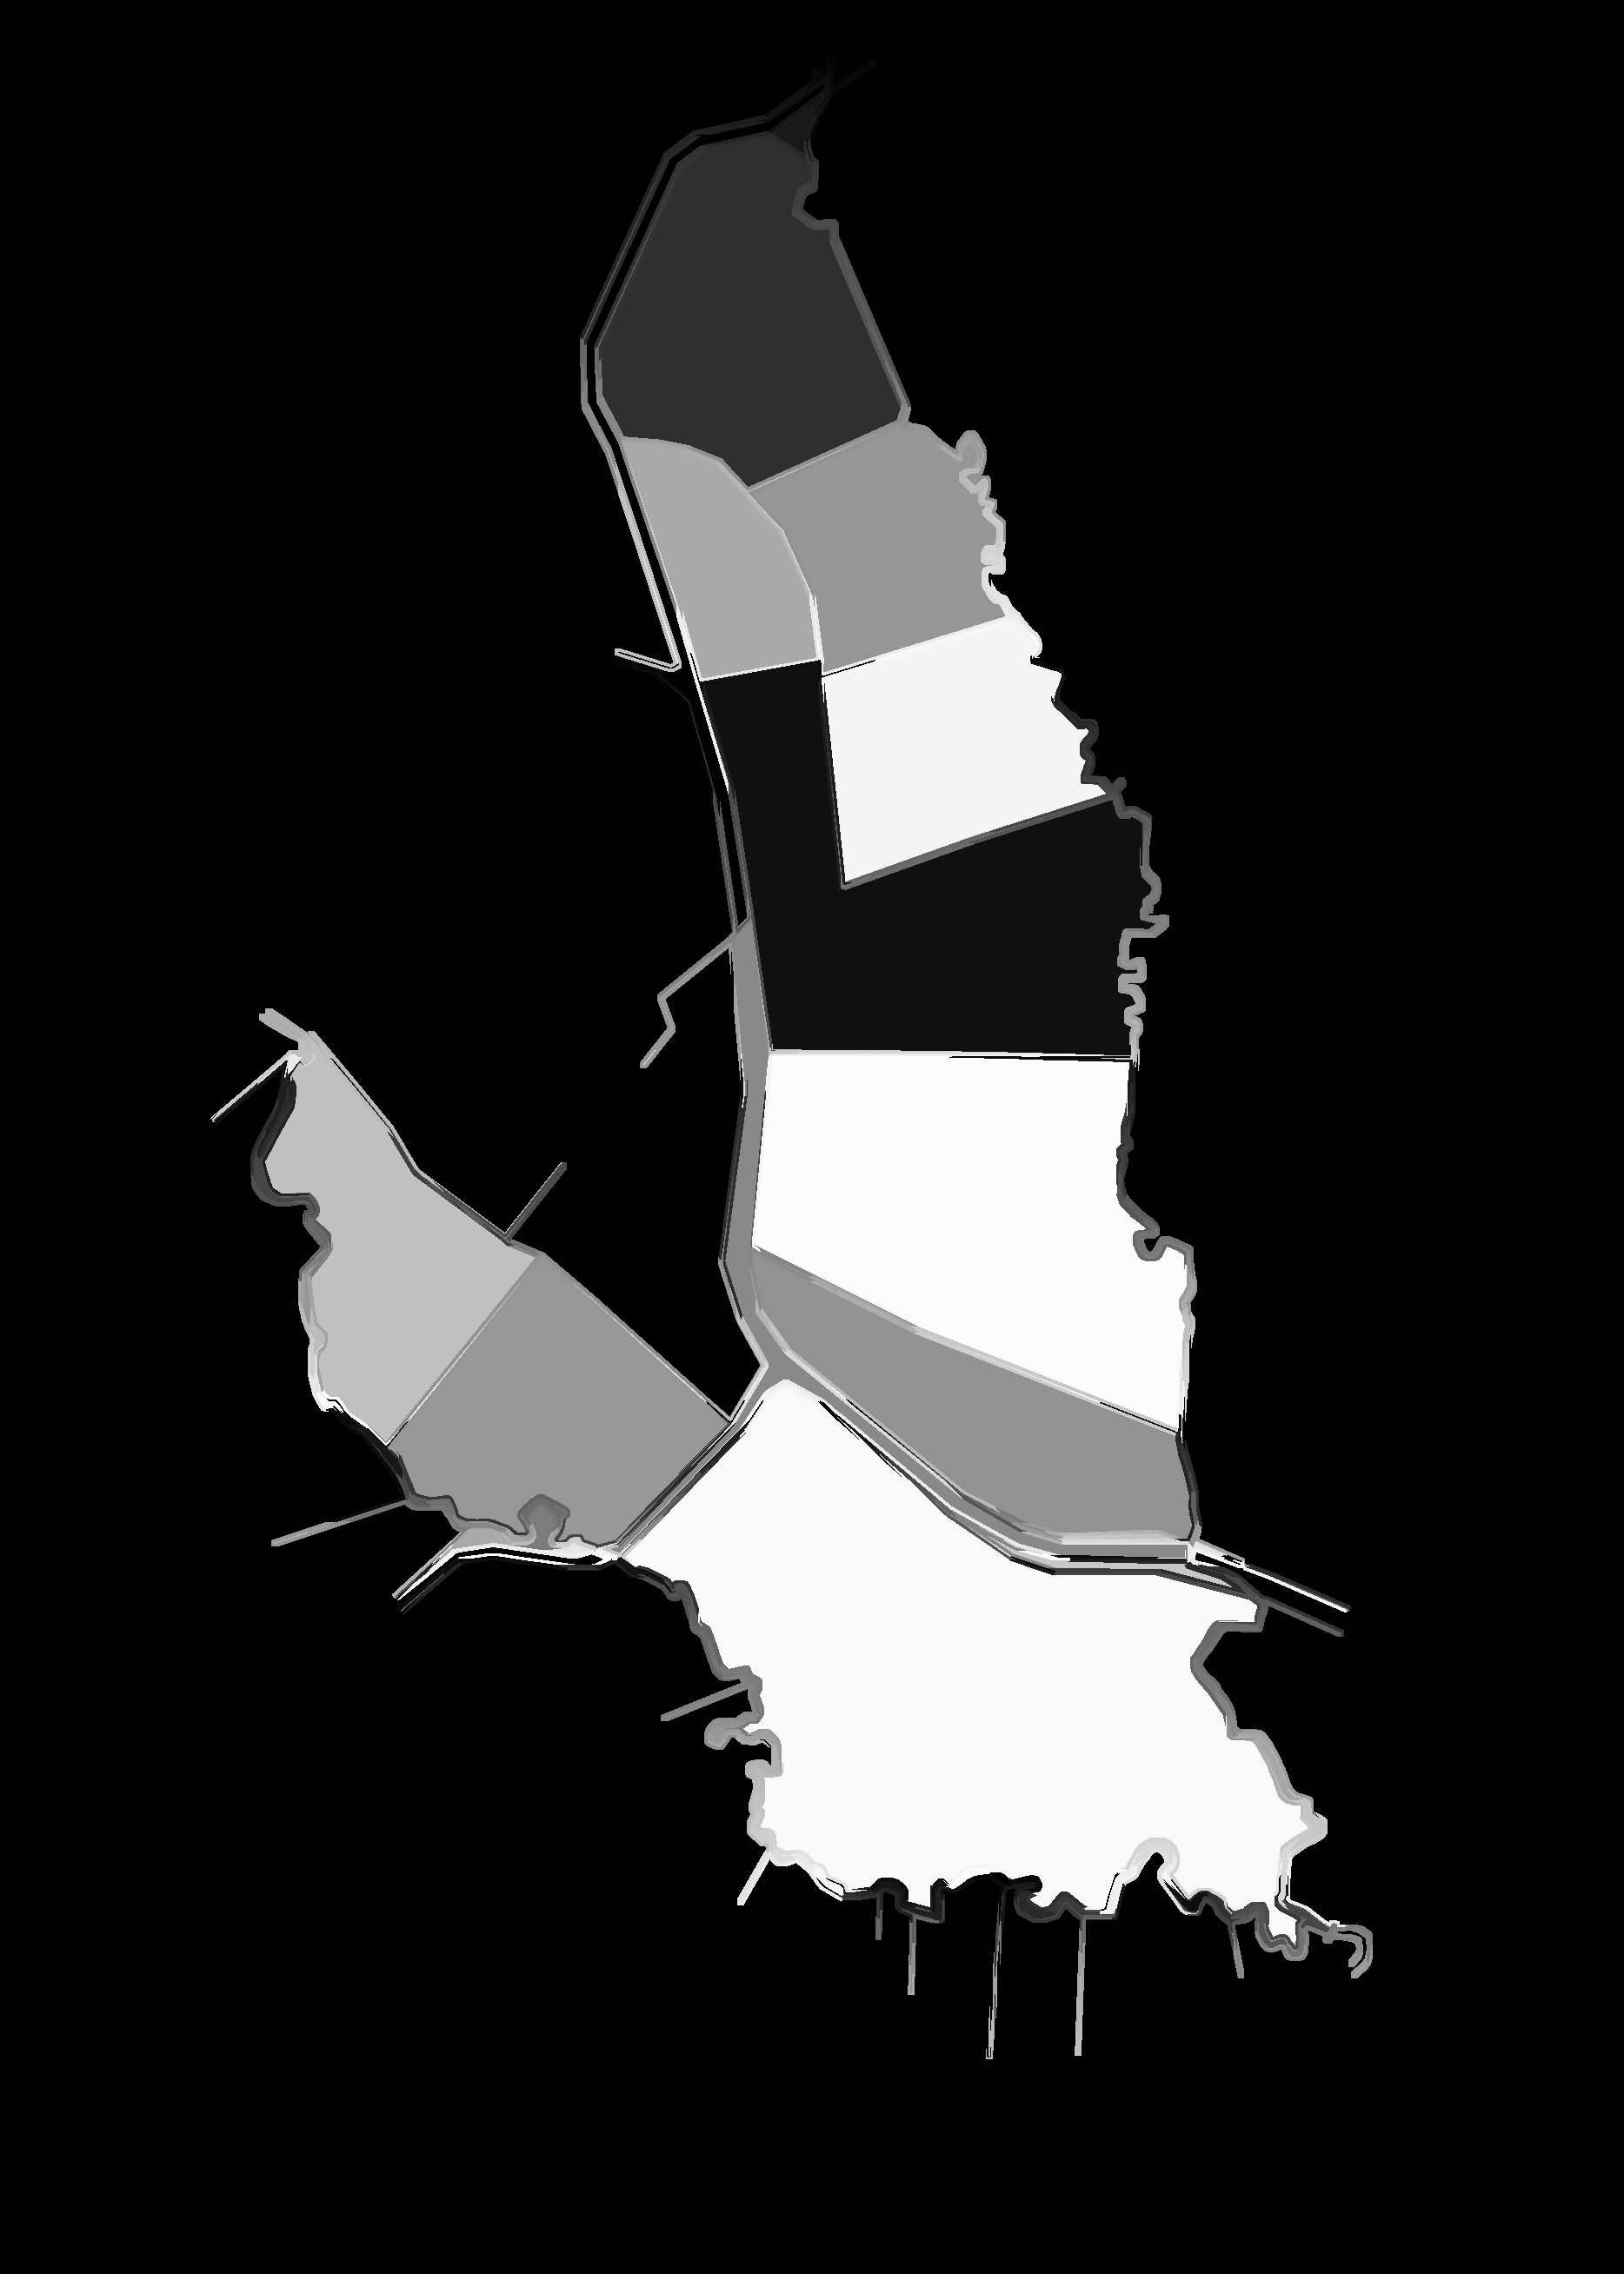

In [70]:
Image.fromarray((f % 255).astype('uint8'))

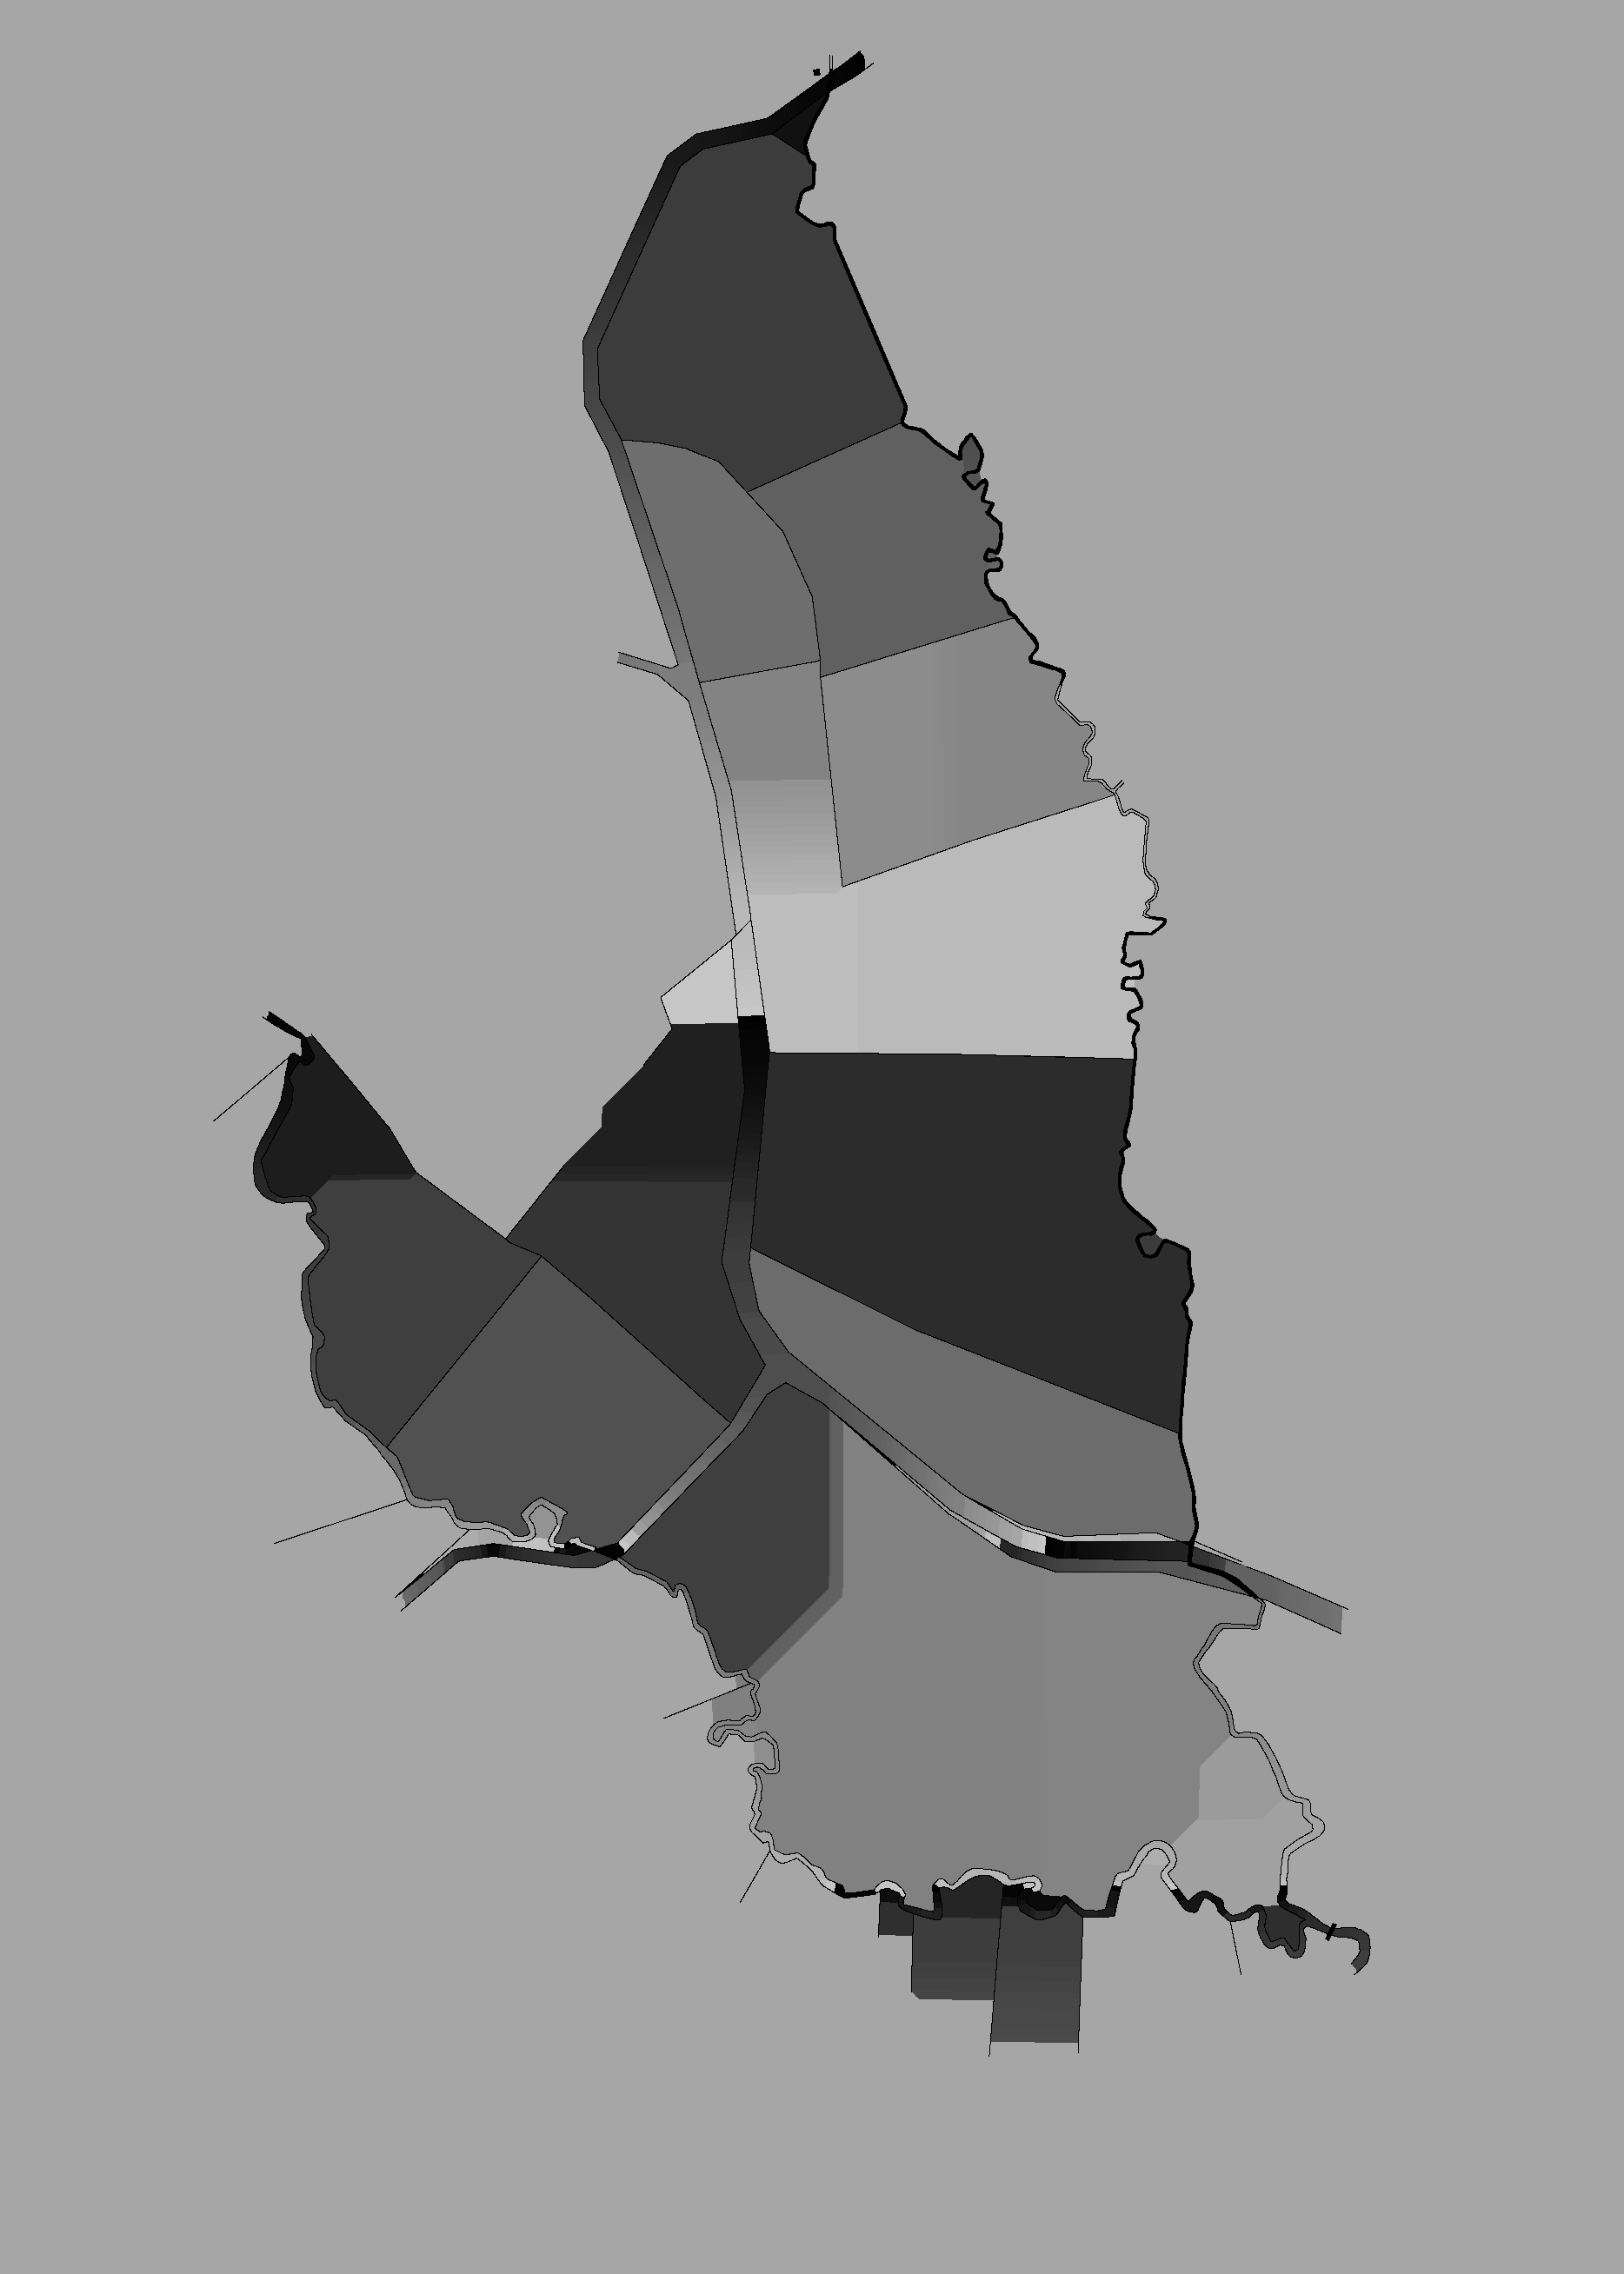

In [60]:
Image.fromarray((labels % 200).astype('uint8'))